## UNDERSTANDING AI MODULE 771763_A24_T1

## PORTFOLIO OF WORK (SUMMATIVE ASSESSMENT)

## NAME: OLAMIDE BANKOLE

## STUDENT ID: 202428313

## COMPONENT ONE

## Importing libraries needed for the tasks

In [212]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [17]:
vg_df = pd.read_csv("./Video_Games.csv")
vg_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


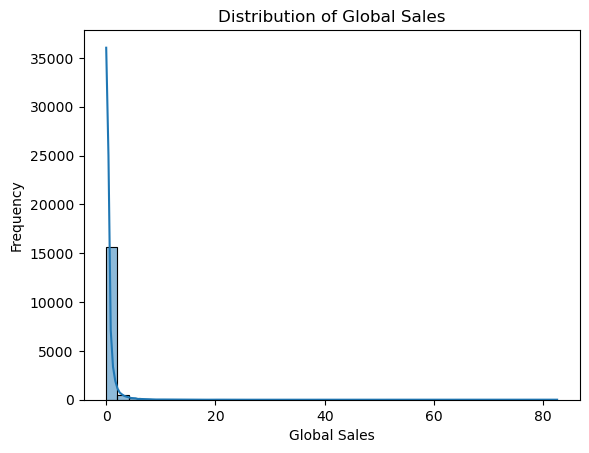

In [278]:
# Creating the histogram with KDE
sns.histplot(vg_df["Global_Sales"], bins=40, kde=True)

# title of plot
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales")
plt.ylabel("Frequency")

# Save the plot 
plt.savefig("global_sales_histogram.png", dpi=300, bbox_inches='tight') 

# Display the plot
plt.show()


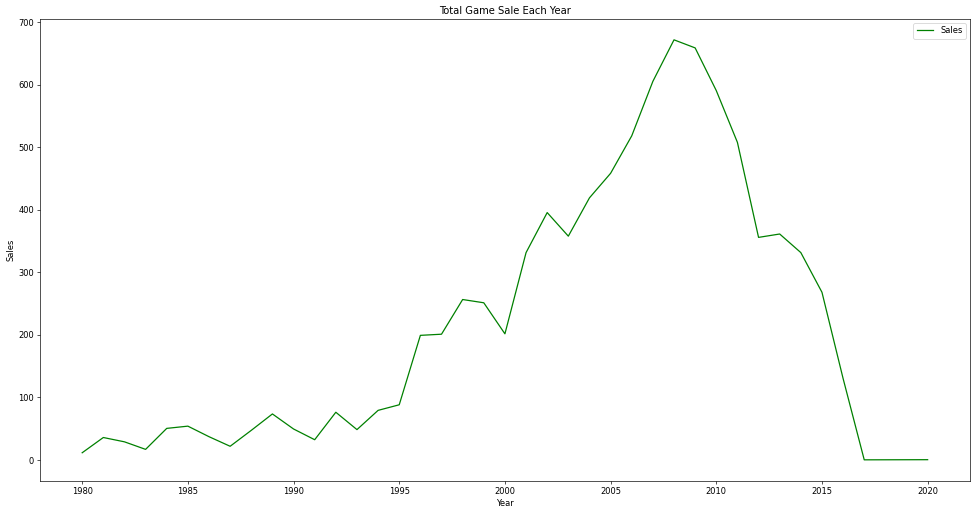

In [28]:
sales_df=vg_df.groupby('Year_of_Release',as_index=False).sum()

x_axis=sales_df['Year_of_Release']
y_axis=sales_df['Global_Sales']

plt.figure(figsize=(20,10),dpi=60)
plt.plot(x_axis,y_axis,label='Sales',color='green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Game Sale Each Year')
plt.legend()
plt.show()

##### From the plot above Video games had peak global sales between 2005 and 2010

In [74]:
print(vg_df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [30]:
vg_df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [229]:
vg_df.Year_of_Release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

## Cleaning the data

In [22]:
#replace empty strings with nan
vg_df.replace("", np.nan, inplace=True)

In [24]:
# Replace 'tbd' with NaN
vg_df['User_Score'] = vg_df['User_Score'].replace('tbd', np.nan)
vg_df['User_Score'] = pd.to_numeric(vg_df['User_Score'], errors='coerce')

# Replace 'nan' with NaN
vg_df['User_Score'] = vg_df['User_Score'].replace('nan', np.nan)


In [36]:
vg_df.User_Score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [26]:
vg_df.drop(vg_df[vg_df.Name.isnull()].index, inplace = True) 
vg_df.drop(vg_df[vg_df.Genre.isnull()].index, inplace = True) 
vg_df.drop(vg_df[vg_df.Publisher.isnull()].index, inplace = True) 
vg_df.drop(vg_df[vg_df.Year_of_Release.isnull()].index, inplace = True) 

In [28]:
# Convert 'Year_of_Release' column from float to int
vg_df['Year_of_Release'] = vg_df['Year_of_Release'].astype(int)

# Check the changes
print(vg_df['Year_of_Release'].dtype)

int64


In [30]:
# Fill NaN values in 'Global Sales' column with the mean of the column
vg_df['Critic_Score'] = vg_df['Critic_Score'].fillna(vg_df['Critic_Score'].median())
vg_df['Critic_Count'] = vg_df['Critic_Count'].fillna(vg_df['Critic_Count'].median())
vg_df['User_Score'] = vg_df['User_Score'].fillna(vg_df['User_Score'].median())
vg_df['User_Count'] = vg_df['User_Count'].fillna(vg_df['User_Count'].median())
# Fill NaN values in 'Developer' column with the mode of 'Developer'
vg_df['Developer'] = vg_df['Developer'].fillna(vg_df['Developer'].mode()[0])

# Fill NaN values in 'Rating' column with the mode of 'Rating'
vg_df['Rating'] = vg_df['Rating'].fillna(vg_df['Rating'].mode()[0])

In [32]:
# Just display the shape
print(vg_df.shape)


(16416, 16)


## Linear regression model using numerical features

Plot saved to Linear Regression Plots/NA_Sales_vs_Global_Sales.png


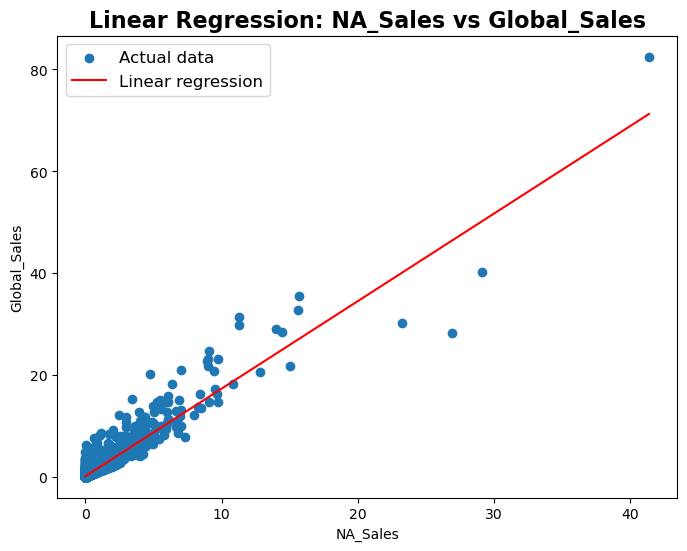

Linear regression plot for: NA_Sales vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/EU_Sales_vs_Global_Sales.png


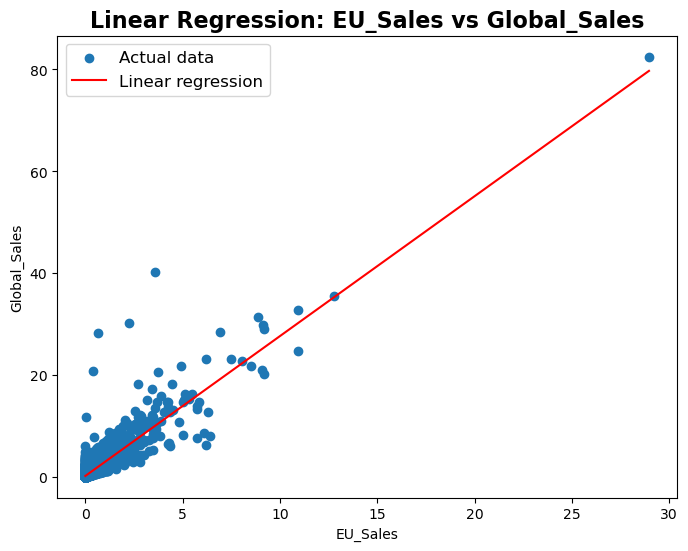

Linear regression plot for: EU_Sales vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/JP_Sales_vs_Global_Sales.png


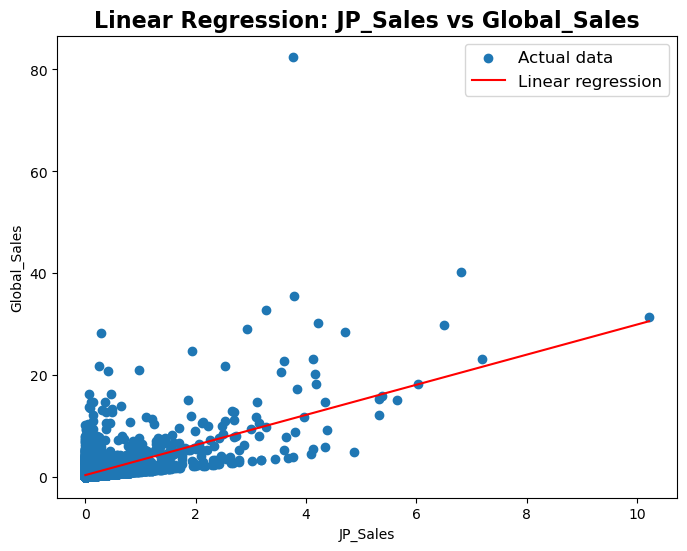

Linear regression plot for: JP_Sales vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/Other_Sales_vs_Global_Sales.png


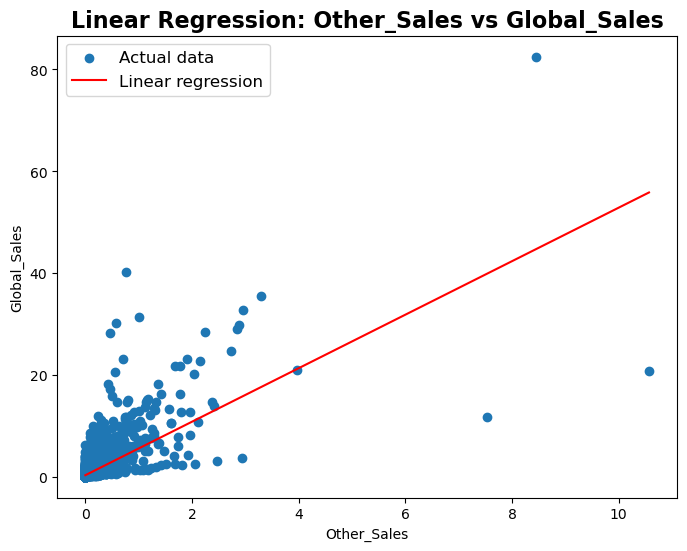

Linear regression plot for: Other_Sales vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/Year_of_Release_vs_Global_Sales.png


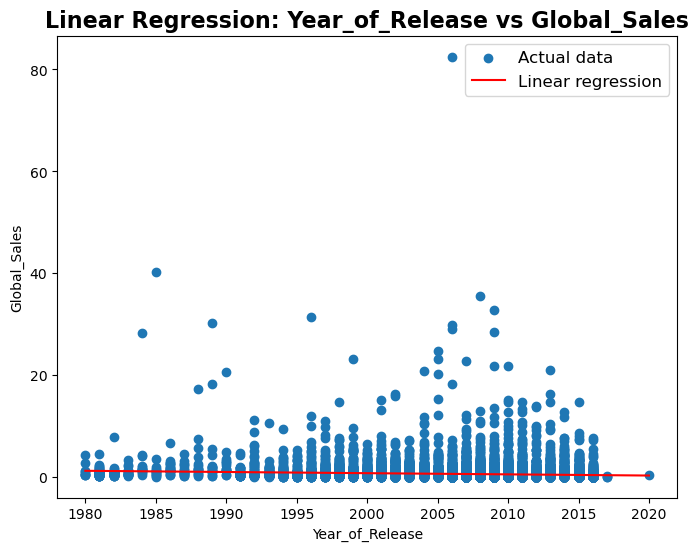

Linear regression plot for: Year_of_Release vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/User_Score_vs_Global_Sales.png


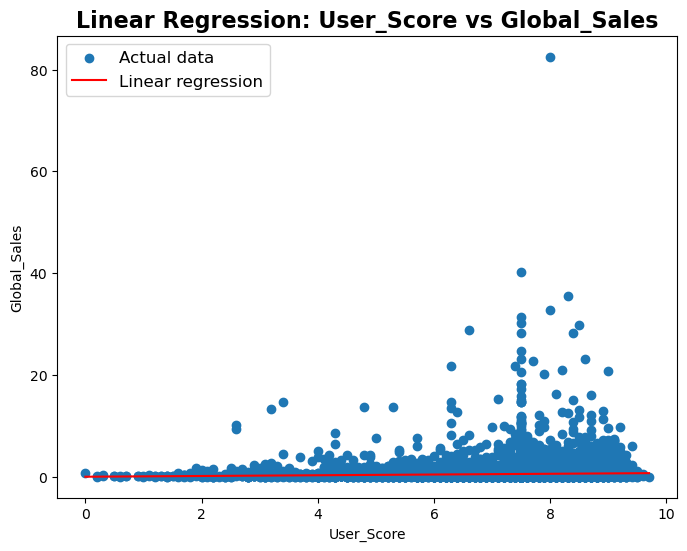

Linear regression plot for: User_Score vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/User_Count_vs_Global_Sales.png


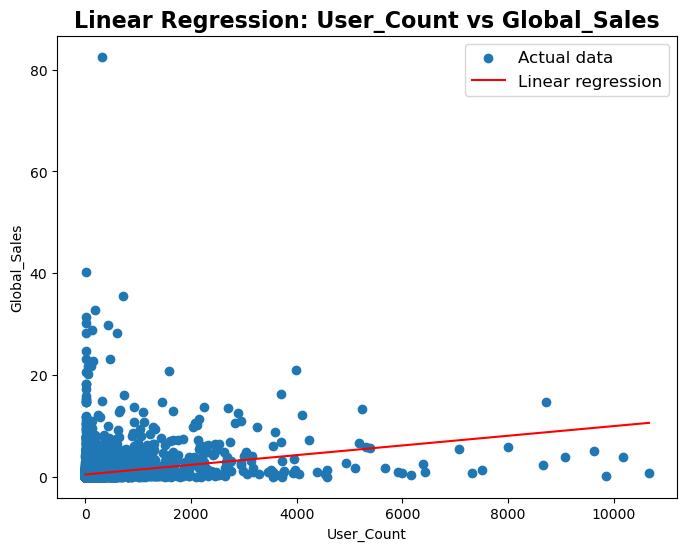

Linear regression plot for: User_Count vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/Critic_Count_vs_Global_Sales.png


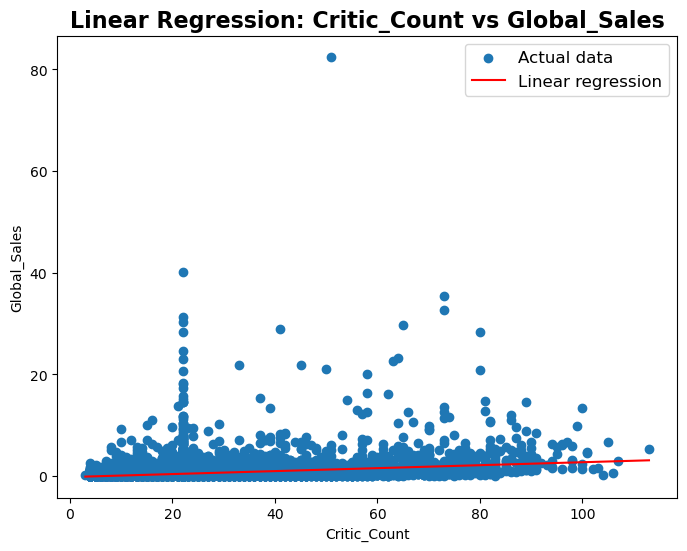

Linear regression plot for: Critic_Count vs Global_Sales
--------------------------------------------------
Plot saved to Linear Regression Plots/Critic_Score_vs_Global_Sales.png


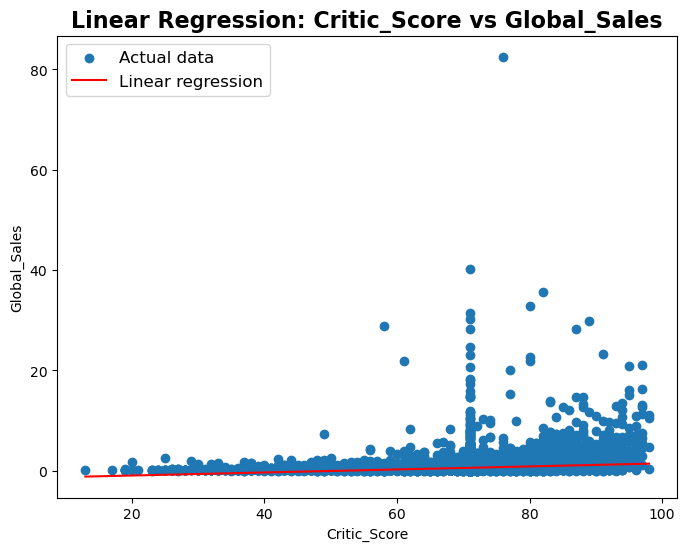

Linear regression plot for: Critic_Score vs Global_Sales
--------------------------------------------------


In [72]:
import os

# Define the function for linear regression to avoid repetition of codes
def linear_regression(vg_df, feature, target, save_dir="Linear Regression Plots"):
    # Ensure the save directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Define the feature (X) and target (y)
    x = vg_df[feature]  # Feature
    y = vg_df[target]  # Target
    
    # Convert the 'x' feature into a 2D array (required by scikit-learn)
    x = x.to_numpy().reshape(-1, 1)  # Convert the feature into a 2D numpy array
    
    # Split the data into training and testing sets (80% training, 20% testing)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler to standardize the data
    scale = StandardScaler()

    # Fit the scaler to the training data only
    scale.fit(x_train)

    # Apply the transformation to the training and testing data
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)

    # Initialize the linear regression model
    linear_model = LinearRegression()

    # Fit the linear regression model
    linear_model.fit(x_train_scaled, y_train)

    # Predict the target on the test set
    y_pred = linear_model.predict(x_test_scaled)

    # Plotting
    # Generate a range of values for smooth plotting
    x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
    x_range_scaled = scale.transform(x_range)  # Apply the same scaling
    y_range_pred = linear_model.predict(x_range_scaled)  # Predict the straight line

    # Create a figure and axis object for better customization
    plt.figure(figsize=(8, 6))

    # Plot the actual data points (scatter plot)
    plt.scatter(x, y, label='Actual data')

    # Plot the linear regression line (smooth curve)
    plt.plot(x_range, y_range_pred, label='Linear regression', color='red')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Linear Regression: {feature} vs {target}', fontsize=16, fontweight='bold')

    # Add a legend
    plt.legend(loc='best', fontsize=12)

    # Save the plot to the specified directory
    plot_path = os.path.join(save_dir, f"{feature}_vs_{target}.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to {plot_path}")

    # Show the plot
    plt.show()

# Define the feature-target pairs you want to analyze
feature_target_pairs = [
    ('NA_Sales', 'Global_Sales'),
    ('EU_Sales', 'Global_Sales'),
    ('JP_Sales', 'Global_Sales'),
    ('Other_Sales', 'Global_Sales'),
    ('Year_of_Release', 'Global_Sales'),
    ('User_Score', 'Global_Sales'),
    ('User_Count', 'Global_Sales'),
    ('Critic_Count', 'Global_Sales'),
    ('Critic_Score', 'Global_Sales')
]

# Loop through the feature-target pairs and perform linear regression for each
for feature, target in feature_target_pairs:
    linear_regression(vg_df, feature, target)  # Perform linear regression
    print(f"Linear regression plot for: {feature} vs {target}")
    print("-" * 50)


##  Metrics for linear regression model - MSE, R² , RMSE and MAE

In [68]:
# Define a function to calculate MSE, R², MAE, and RMSE for linear regression
def calculate_mse_r2(vg_df, feature, target):
    # Define the feature (X) and target (y)
    x = vg_df[feature]  # Feature
    y = vg_df[target]  # Target
    
    # Convert the 'x' feature into a 2D array (required by scikit-learn)
    x = x.to_numpy().reshape(-1, 1)  # Convert the feature into a 2D numpy array
    
    # Split the data into training and testing sets (80% training, 20% testing)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler to standardize the data
    scale = StandardScaler()

    # Fit the scaler to the training data only
    scale.fit(x_train)

    # Apply the transformation to the training and testing data
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)

    # Initialize the linear regression model
    vg_linear = LinearRegression()

    # Fit the model to the training data
    vg_linear.fit(x_train_scaled, y_train)
    gradient = vg_linear.coef_[0]
    intercept = vg_linear.intercept_
    print(f"The gradient is: {gradient:.2f}")
    print(f"The intercept is: {intercept:.2f}")

    # Predict the target on the test set
    y_pred = vg_linear.predict(x_test_scaled)

    # Calculate MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R² (coefficient of determination)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mse) 

    return mse, r2, mae, rmse

# Define the feature-target pairs you want to analyze
feature_target_pairs = [
    ('NA_Sales', 'Global_Sales'),
    ('EU_Sales', 'Global_Sales'),
    ('JP_Sales', 'Global_Sales'),
    ('Other_Sales', 'Global_Sales'),
    ('Year_of_Release', 'Global_Sales'),
    ('User_Score', 'Global_Sales'),
    ('User_Count', 'Global_Sales'),
    ('Critic_Count', 'Global_Sales'),
    ('Critic_Score', 'Global_Sales')
]

# Loop through the feature-target pairs and calculate metrics for each
for feature, target in feature_target_pairs:
    mse, r2, mae, rmse = calculate_mse_r2(vg_df, feature, target)  # Adjusted for all metrics
    print(f"{feature} vs {target}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² (Coefficient of Determination): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 50)

The gradient is: 1.31
The intercept is: 0.53
NA_Sales vs Global_Sales
Mean Squared Error (MSE): 0.3005
R² (Coefficient of Determination): 0.9290
Mean Absolute Error (MAE): 0.2023
Root Mean Squared Error (RMSE): 0.5482
--------------------------------------------------
The gradient is: 1.22
The intercept is: 0.53
EU_Sales vs Global_Sales
Mean Squared Error (MSE): 0.3241
R² (Coefficient of Determination): 0.9235
Mean Absolute Error (MAE): 0.2448
Root Mean Squared Error (RMSE): 0.5693
--------------------------------------------------
The gradient is: 0.90
The intercept is: 0.53
JP_Sales vs Global_Sales
Mean Squared Error (MSE): 2.8892
R² (Coefficient of Determination): 0.3177
Mean Absolute Error (MAE): 0.5293
Root Mean Squared Error (RMSE): 1.6998
--------------------------------------------------
The gradient is: 0.96
The intercept is: 0.53
Other_Sales vs Global_Sales
Mean Squared Error (MSE): 1.2493
R² (Coefficient of Determination): 0.7050
Mean Absolute Error (MAE): 0.3505
Root Mean S

## Confusion matrix for numerical features in our dataset

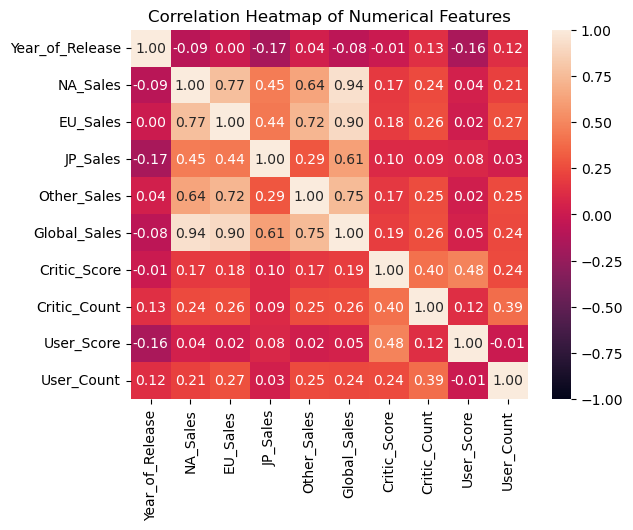

In [274]:
# Calculate the Correlation coefficients 
# Define which variables to use in Calculating correlation matrix of the numeric data
Column_list =  ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 
               'Other_Sales', 'Global_Sales', 'Critic_Score', 
               'Critic_Count', 'User_Score', 'User_Count']

# Use seaborn's heatmap function to plot the graph
Correlation_plot = sns.heatmap(vg_df[Column_list].corr(), vmin = -1, vmax = 1, annot = True,fmt=".2f")

# Save the plot as an image file
plt.title("Correlation Heatmap of Numerical Features")  # Add a title to the heatmap if needed
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')  # Save as a PNG file
plt.show()  # Show the plot

## Polynomial Regression using numerical features

Plot saved as Polynomial Regression Plots/NA_Sales_vs_Global_Sales_poly_deg2.png


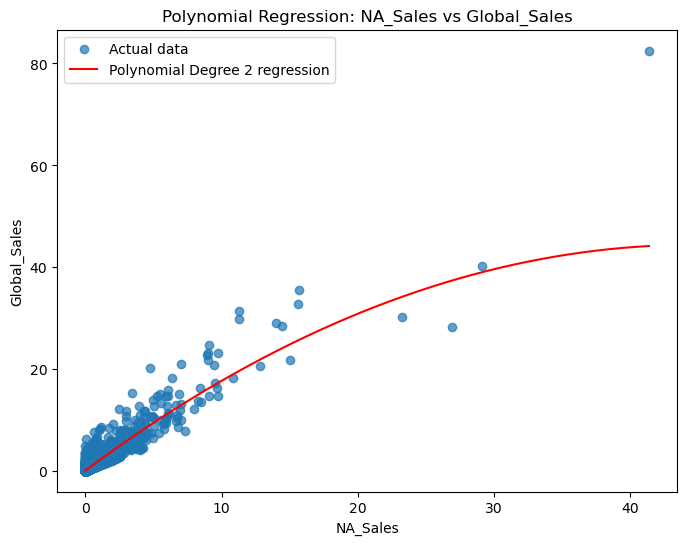

Polynomial regression plot for: NA_Sales vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/EU_Sales_vs_Global_Sales_poly_deg2.png


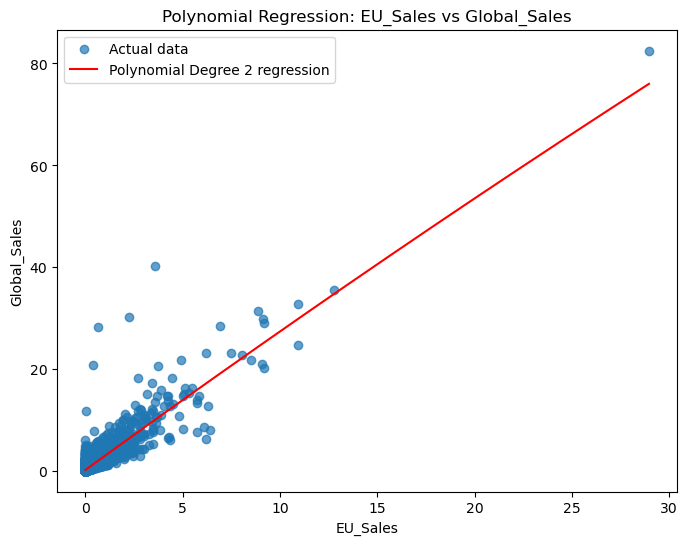

Polynomial regression plot for: EU_Sales vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/JP_Sales_vs_Global_Sales_poly_deg2.png


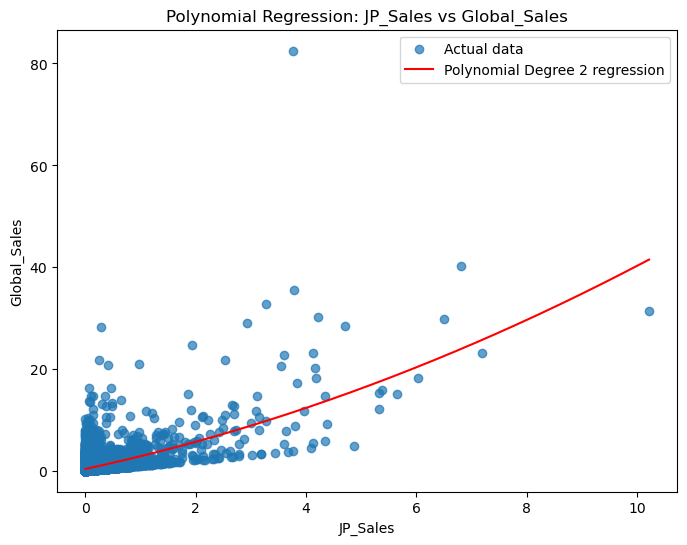

Polynomial regression plot for: JP_Sales vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/Other_Sales_vs_Global_Sales_poly_deg2.png


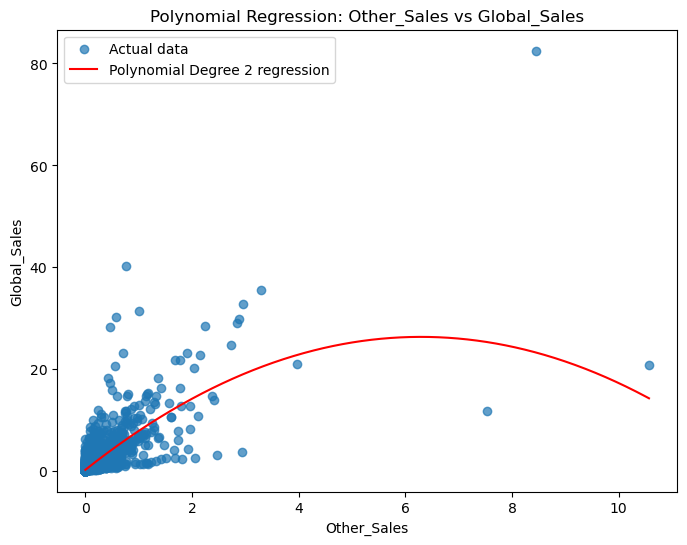

Polynomial regression plot for: Other_Sales vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/Year_of_Release_vs_Global_Sales_poly_deg2.png


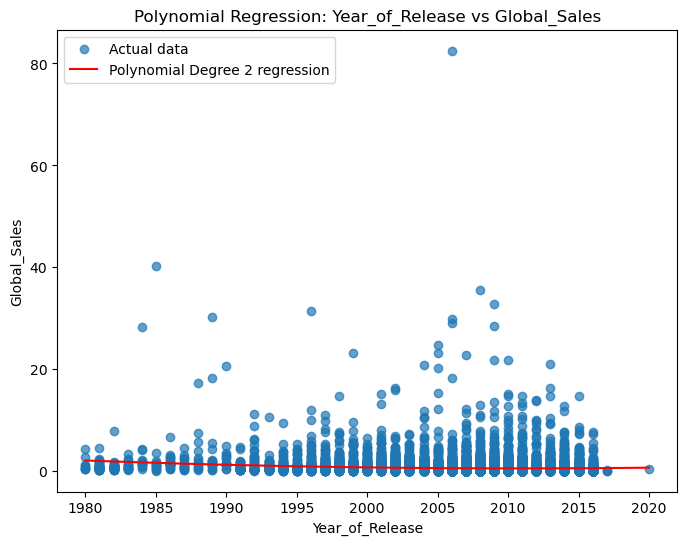

Polynomial regression plot for: Year_of_Release vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/User_Score_vs_Global_Sales_poly_deg2.png


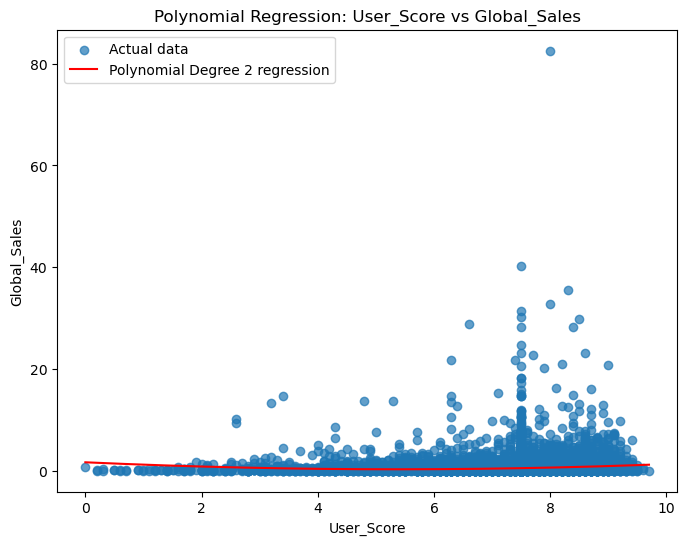

Polynomial regression plot for: User_Score vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/User_Count_vs_Global_Sales_poly_deg2.png


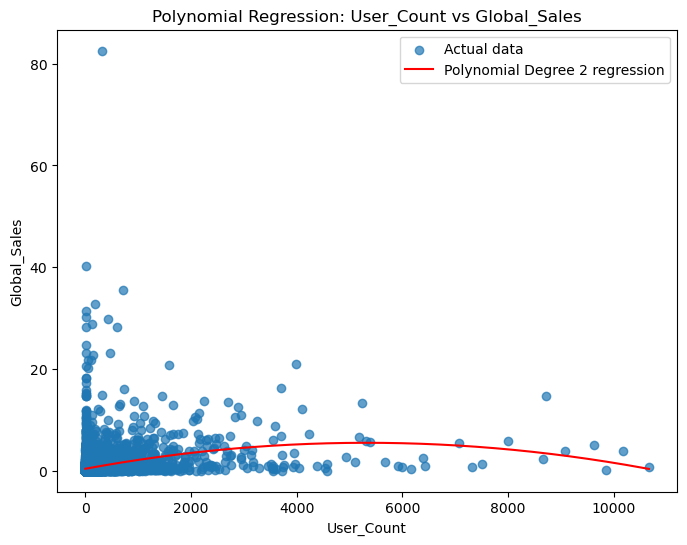

Polynomial regression plot for: User_Count vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/Critic_Count_vs_Global_Sales_poly_deg2.png


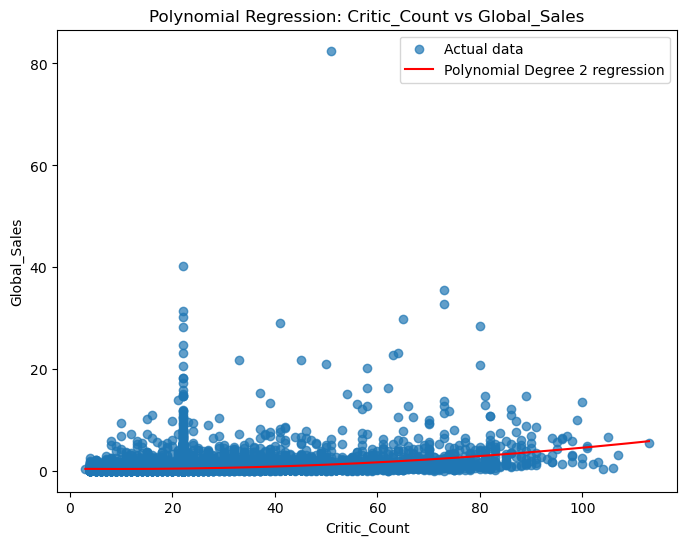

Polynomial regression plot for: Critic_Count vs Global_Sales
--------------------------------------------------
Plot saved as Polynomial Regression Plots/Critic_Score_vs_Global_Sales_poly_deg2.png


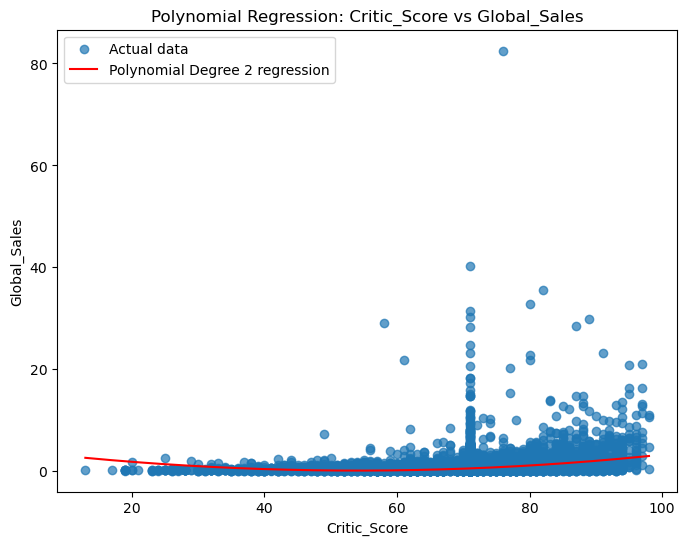

Polynomial regression plot for: Critic_Score vs Global_Sales
--------------------------------------------------


In [80]:
# Define the function for polynomial regression
def polynomial_regression(vg_df, feature, target, degree=2, save_dir="Polynomial Regression Plots"):
    # Ensure the save directory exists
    os.makedirs(save_dir, exist_ok=True)
    
    # Define the feature (X) and target (y)
    x = vg_df[feature]  # Feature
    y = vg_df[target]  # Target
    
    # Convert the 'x' feature into a 2D array (required by scikit-learn)
    x = x.to_numpy().reshape(-1, 1)  # Convert the feature into a 2D numpy array
    
    # Split the data into training and testing sets (80% training, 20% testing)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler to standardize the data
    scale = StandardScaler()

    # Fit the scaler to the training data only
    scale.fit(x_train)

    # Apply the transformation to the training and testing data
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)

    # Initialize PolynomialFeatures with the desired degree
    poly_features = PolynomialFeatures(degree=degree)
    
    # Transform the training and test features to include polynomial terms
    x_train_poly = poly_features.fit_transform(x_train_scaled)
    x_test_poly = poly_features.transform(x_test_scaled)

    # Initialize the linear regression model
    poly_linear = LinearRegression()

    # Fit the polynomial regression model
    poly_linear.fit(x_train_poly, y_train)

    # Predict the target on the test set
    y_pred = poly_linear.predict(x_test_poly)

    # Plot the results
    # Generate a range of values for smooth plotting
    x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
    x_range_scaled = scale.transform(x_range)  # Apply the same scaling
    x_range_poly = poly_features.transform(x_range_scaled)  # Apply polynomial features transformation
    y_range_pred = poly_linear.predict(x_range_poly)  # Predict the smooth curve

    # Plotting
    plt.figure(figsize=(8, 6))  # Adjust plot size
    plt.scatter(x, y, label='Actual data', alpha=0.7)
    plt.plot(x_range, y_range_pred, color='red', label=f'Polynomial Degree {degree} regression')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Polynomial Regression: {feature} vs {target}')
    plt.legend()
    
    # Save the plot
    plot_filename = os.path.join(save_dir, f"{feature}_vs_{target}_poly_deg{degree}.png")
    plt.savefig(plot_filename, dpi=300, bbox_inches="tight")
    print(f"Plot saved as {plot_filename}")
    
    plt.show()

# Define the feature-target pairs you want to analyze
feature_target_pairs = [
    ('NA_Sales', 'Global_Sales'),
    ('EU_Sales', 'Global_Sales'),
    ('JP_Sales', 'Global_Sales'),
    ('Other_Sales', 'Global_Sales'),
    ('Year_of_Release', 'Global_Sales'),
    ('User_Score', 'Global_Sales'),
    ('User_Count', 'Global_Sales'),
    ('Critic_Count', 'Global_Sales'),
    ('Critic_Score', 'Global_Sales')
]

# Directory to save the plots
save_directory = "Polynomial Regression Plots"

# Loop through the feature-target pairs and perform polynomial regression for each
for feature, target in feature_target_pairs:
    polynomial_regression(vg_df, feature, target, degree=2, save_dir=save_directory)  # Use degree 2 as default
    print(f"Polynomial regression plot for: {feature} vs {target}")
    print("-" * 50)


## Metrics for polynomial regression model - MSE, R² , RMSE and MAE

In [201]:
# Function to calculate metrics for Polynomial Regression
def calculate_polynomial_metrics(vg_df, feature, target, degree=2):
    # Define the feature (X) and target (y)
    X = vg_df[[feature]]  # Feature
    y = vg_df[target]  # Target
    
    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Polynomial Transformation
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Initialize the linear regression model
    poly_model = LinearRegression()

    # Fit the model to the training data
    poly_model.fit(X_train_poly, y_train)

    # Predict the target on the test set
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred_poly)
    r2 = r2_score(y_test, y_pred_poly)
    mae = mean_absolute_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)

    # Get coefficients and intercept (gradients and intercept)
    coefficients = poly_model.coef_
    intercept = poly_model.intercept_

    # Print the results for the polynomial regression model
    print(f"Polynomial Regression (Degree {degree}) for Feature: {feature}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Coefficients (Gradients): {coefficients}")
    print(f"Intercept: {intercept:.4f}")
    print("-" * 50)

    return mse, r2, mae, rmse, coefficients, intercept

# Feature-target pairs to analyze
feature_target_pairs = [
    ('NA_Sales', 'Global_Sales'),
    ('EU_Sales', 'Global_Sales'),
    ('JP_Sales', 'Global_Sales'),
    ('Other_Sales', 'Global_Sales'),
    ('Year_of_Release', 'Global_Sales'),
    ('User_Score', 'Global_Sales'),
    ('User_Count', 'Global_Sales'),
    ('Critic_Count', 'Global_Sales'),
    ('Critic_Score', 'Global_Sales')
]

# Loop through each feature-target pair and calculate metrics for polynomial regression
for feature, target in feature_target_pairs:
    calculate_polynomial_metrics(vg_df, feature, target, degree=2)


Polynomial Regression (Degree 2) for Feature: NA_Sales
MSE: 0.7066
R²: 0.8332
MAE: 0.2105
RMSE: 0.8406
Coefficients (Gradients): [ 0.          1.98457663 -0.02220037]
Intercept: 0.0250
--------------------------------------------------
Polynomial Regression (Degree 2) for Feature: EU_Sales
MSE: 0.3346
R²: 0.9210
MAE: 0.2456
RMSE: 0.5784
Coefficients (Gradients): [ 0.          2.77463645 -0.00535194]
Intercept: 0.1327
--------------------------------------------------
Polynomial Regression (Degree 2) for Feature: JP_Sales
MSE: 2.8688
R²: 0.3226
MAE: 0.5234
RMSE: 1.6937
Coefficients (Gradients): [0.         2.33461981 0.16533205]
Intercept: 0.3334
--------------------------------------------------
Polynomial Regression (Degree 2) for Feature: Other_Sales
MSE: 1.6922
R²: 0.6004
MAE: 0.2902
RMSE: 1.3008
Coefficients (Gradients): [ 0.          8.301254   -0.65958381]
Intercept: 0.1593
--------------------------------------------------
Polynomial Regression (Degree 2) for Feature: Year_of_Re

##### Using the evaluation metrics above NA_Sales has the highest Linear R² score (0.9290), indicating that it explains about 92.9% of the variance in Global Sales. NA_Sales also has the lowest Linear MSE(0.3005), showing it has the best prediction accuracy and best predictor for “global sales” of video games 
##### Conclusively NA_Sales fits best with a linear model. The linear R² score is higher than the polynomial R² score, indicating that the linear model predictus more accurately than the Polynomial. 

## For each numerical input feature, is the global sales better fit by a linear model or by a non-linear (e.g. polynomial) model?

In [204]:
# Identify numerical features and the target variable
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score', 'User_Count', 'Critic_Count', 'Year_of_Release']
target = 'Global_Sales'

# Initialize a dictionary to store results
results = {}

# Loop through each numerical feature
for feature in numerical_features:
    print(f"Analyzing feature: {feature}")
    
    # Split the data
    X = vg_df[[feature]]
    y = vg_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model = LinearRegression().fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    linear_mse = mean_squared_error(y_test, y_pred_linear)
    linear_r2 = r2_score(y_test, y_pred_linear)
    
    # Polynomial Regression (degree=2)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression().fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    poly_mse = mean_squared_error(y_test, y_pred_poly)
    poly_r2 = r2_score(y_test, y_pred_poly)
    
    # Store results
    results[feature] = {
        "Linear MSE": linear_mse,
        "Linear R²": linear_r2,
        "Polynomial MSE": poly_mse,
        "Polynomial R²": poly_r2,
    }
    
    # Print comparison
    print(f"  Linear Regression -> MSE: {linear_mse:.4f}, R²: {linear_r2:.4f}")
    print(f"  Polynomial Regression -> MSE: {poly_mse:.4f}, R²: {poly_r2:.4f}")
    print(f"  Best Fit: {'Polynomial' if poly_r2 > linear_r2 else 'Linear'}\n")

# Final Results
print("\nSummary of Results:")
for feature, metrics in results.items():
    print(f"Feature: {feature}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print(f"  Best Fit: {'Polynomial' if metrics['Polynomial R²'] > metrics['Linear R²'] else 'Linear'}\n")


Analyzing feature: NA_Sales
  Linear Regression -> MSE: 0.3005, R²: 0.9290
  Polynomial Regression -> MSE: 0.7066, R²: 0.8332
  Best Fit: Linear

Analyzing feature: EU_Sales
  Linear Regression -> MSE: 0.3241, R²: 0.9235
  Polynomial Regression -> MSE: 0.3346, R²: 0.9210
  Best Fit: Linear

Analyzing feature: JP_Sales
  Linear Regression -> MSE: 2.8892, R²: 0.3177
  Polynomial Regression -> MSE: 2.8688, R²: 0.3226
  Best Fit: Polynomial

Analyzing feature: Other_Sales
  Linear Regression -> MSE: 1.2493, R²: 0.7050
  Polynomial Regression -> MSE: 1.6922, R²: 0.6004
  Best Fit: Linear

Analyzing feature: Critic_Score
  Linear Regression -> MSE: 4.1502, R²: 0.0200
  Polynomial Regression -> MSE: 4.0918, R²: 0.0338
  Best Fit: Polynomial

Analyzing feature: User_Score
  Linear Regression -> MSE: 4.2297, R²: 0.0012
  Polynomial Regression -> MSE: 4.2237, R²: 0.0026
  Best Fit: Polynomial

Analyzing feature: User_Count
  Linear Regression -> MSE: 4.1097, R²: 0.0295
  Polynomial Regression ->

##### Using the evaluation metrics above The Linear regression model shows a stronger predictivce relationship between "NA_Sales" and Global Sales, with a higher R² value 0.9290 and lower error of 0.3005


## Linear Regression Model using multiple features

In [42]:
# Identify numerical features and the target variable
numerical_features = ['NA_Sales', 'JP_Sales', 'Other_Sales', 'Year_of_Release', 'User_Count', 'Critic_Count']
target = 'Global_Sales'

# Split the data into train and test sets
X = vg_df[numerical_features]
y = vg_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multiple Linear Regression model
multi_feature_model = LinearRegression().fit(X_train, y_train)
y_pred_multi = multi_feature_model.predict(X_test)

# Evaluate the multiple-feature model
multi_mse = mean_squared_error(y_test, y_pred_multi)
multi_rmse = np.sqrt(multi_mse)
multi_mae = mean_absolute_error(y_test, y_pred_multi)
multi_r2 = r2_score(y_test, y_pred_multi)
multi_coefficients = multi_feature_model.coef_
multi_intercept = multi_feature_model.intercept_

# Print multiple-feature model results
print("Multiple Features Linear Regression Model Results:")
print(f"  MSE: {multi_mse:.4f}")
print(f"  RMSE: {multi_rmse:.4f}")
print(f"  MAE: {multi_mae:.4f}")
print(f"  R² Score: {multi_r2:.4f}")
print(f"  Coefficients (Gradients): {multi_coefficients}")
print(f"  Intercept: {multi_intercept:.4f}")

Multiple Features Linear Regression Model Results:
  MSE: 0.1020
  RMSE: 0.3194
  MAE: 0.0977
  R² Score: 0.9759
  Coefficients (Gradients): [1.23894600e+00 1.24603248e+00 1.81070519e+00 3.36756823e-03
 1.29501173e-04 1.11004670e-03]
  Intercept: -6.7712


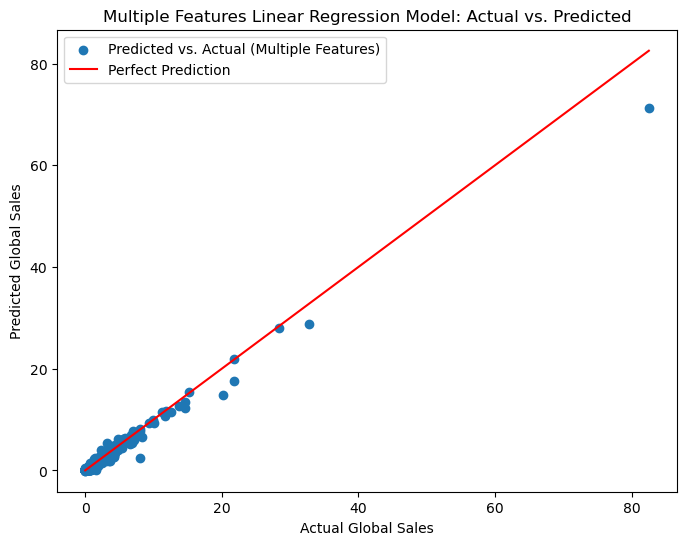

In [44]:
# Visualize the multiple-features model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, label="Predicted vs. Actual (Multiple Features)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Perfect Prediction")
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Multiple Features Linear Regression Model: Actual vs. Predicted")
plt.legend()
plt.show()

## Polynomial Regression Model using multiple features

In [188]:
# Extract numerical features and target variable
numerical_features = ['NA_Sales', 'JP_Sales', 'Other_Sales', 'Year_of_Release', 'User_Count', 'Critic_Count']
target = 'Global_Sales'

# Split the data into training and testing sets
X = vg_df[numerical_features]
y = vg_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial transformation to the features
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree, include_bias=False)  # Exclude bias term
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Polynomial Regression model
poly_model = LinearRegression().fit(X_train_poly, y_train)

# Predict the target variable
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial regression model
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

# Extract coefficients and intercept
poly_coefficients = poly_model.coef_
poly_intercept = poly_model.intercept_

# Print results
print(f"Multiple features Polynomial Regression Model (Degree {degree}) Results:")
print(f"  MSE: {poly_mse:.4f}")
print(f"  RMSE: {poly_rmse:.4f}")
print(f"  MAE: {poly_mae:.4f}")
print(f"  R² Score: {poly_r2:.4f}")
print(f"  Coefficients (Gradients): {poly_coefficients}")
print(f"  Intercept: {poly_intercept:.4f}")

Multiple features Polynomial Regression Model (Degree 2) Results:
  MSE: 0.1236
  RMSE: 0.3516
  MAE: 0.0745
  R² Score: 0.9708
  Coefficients (Gradients): [ 1.46898341e+01 -9.67556125e+00 -1.22295017e+02  8.69795046e-01
 -2.67163237e-03 -2.58097386e-01 -1.78583079e-02  1.25229221e-02
  2.25729858e-01 -6.68106521e-03  7.67320581e-06 -2.91504205e-03
  2.24915327e-02  1.44077536e-02  5.37956486e-03 -6.38058113e-05
 -1.41147409e-03 -3.70723048e-01  6.21039281e-02 -4.35750034e-05
  1.02974734e-02 -2.17803416e-04  1.39313532e-06  1.29047757e-04
 -6.68441480e-09 -4.93791116e-07 -6.89909116e-06]
  Intercept: -868.3686


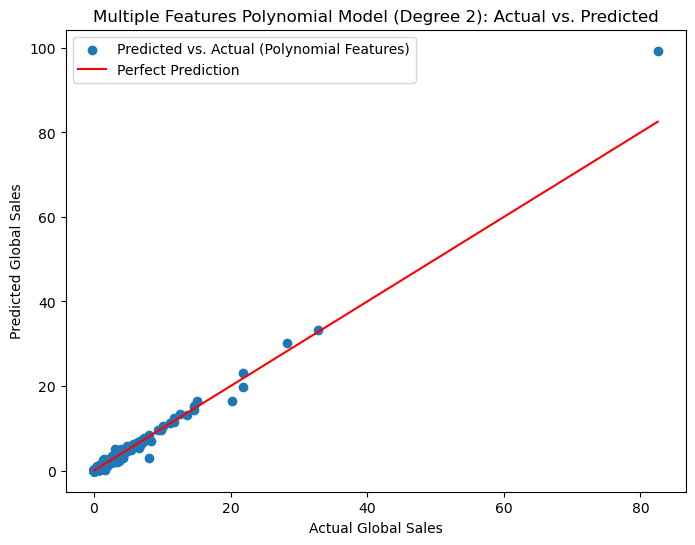

In [36]:
# Visualize the multiple-features polynomial model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, label="Predicted vs. Actual (Polynomial Features)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red",label="Perfect Prediction")
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title(f"Multiple Features Polynomial Model (Degree {degree}): Actual vs. Predicted")
plt.legend()
plt.show()

##### From the evaluation metrics the linear regression model using multiple input features ('NA_Sales', 'JP_Sales', 'Other_Sales', 'Year_of_Release', 'User_Count', 'Critic_Count') as the predictor for the global sales of video games gave an R2 value of 0.9759, signifying high positive correlations between these features and the prediction ('Global Sales').Also, the reduced errors MAE (0.0977) and RMSE (0.3194) further reiterates the better performance of this model compared to the single input feature which gave the highest R2 value of 0.9290 using the 'NA_Sales' as the input feature for linear regression model and an R2 of 0.8332 while using the polynomial regression model.
##### The polynomial regression model using multiple input features as the predictor for the global sales of video games gave an R2 value of 0.9708 which is slighlty lower than the linear regression model with a MAE of 0.0745 and RMSE of 0.3516.

##### In conclusion the multiple-input feature model improves prediction accuracy compared to single-feature models.

## c.Random Forest Regression Model

## Training a regression model that uses all relevant input variables (both categorical and numerical) to predict global sales.

In [52]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define the feature names
feature_names =['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year_of_Release']
x_numerical = vg_df[feature_names]  # Numerical features
x_cat = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']  #adding relevant categorical features

# Target variable
y = vg_df['Global_Sales']

# Scale the numerical features
scaler = MinMaxScaler()
x_numerical_scaled = scaler.fit_transform(x_numerical)

# Initialize LabelEncoder
label_encoders = {}
x_cat_encoded = []

# Apply LabelEncoder to each categorical column
for col in x_cat:
    label_encoder = LabelEncoder()
    x_cat_encoded.append(label_encoder.fit_transform(vg_df[col]))  # Transform each column

# Convert the list of encoded columns into a NumPy array and transpose it
x_cat_encoded = np.array(x_cat_encoded).T  # Transpose so that the shape matches (num_samples, num_categories)

# Concatenate the numerical and categorical features
x = np.concatenate((x_numerical_scaled, x_cat_encoded), axis=1)

# Check the shape of x to ensure it's as expected
print(x.shape)  # Should be (num_samples, 15) if you have 9 numerical features + 6 categorical features

# Now, x contains the concatenated features, and you can proceed with the model

(16416, 10)


In [54]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Erro (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE) : {mae:.4f}")

Mean Squared Error (MSE): 0.7643
R² Score: 0.8195
Root Mean Squared Erro (RMSE): 0.8742
Mean Absolute Error (MAE) : 0.0716


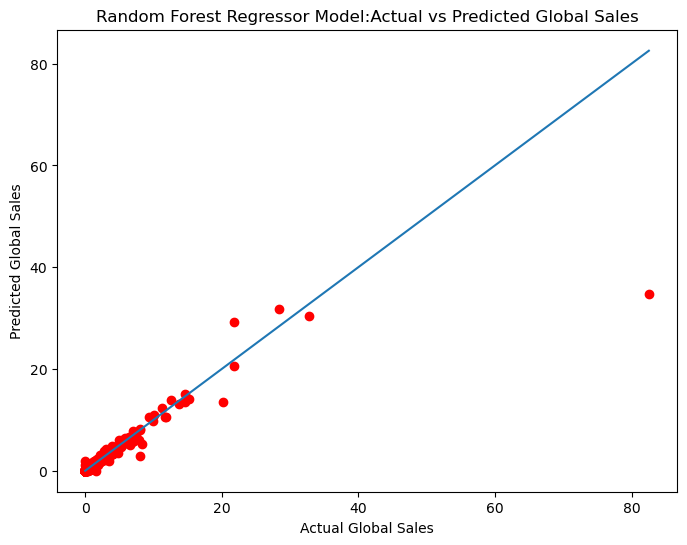

In [56]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # Diagonal line
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Random Forest Regressor Model:Actual vs Predicted Global Sales')
plt.show()

##### From the above evaluation metrcis and plot , random forest regressor has an MSE of 0.7643 and R² Score of 0.8195 which is relatively a good result that suggests the model's predictions are fairly close to the actual values, with lower errors on average.

##### However compared to our Multiple Feature Linear Regression Model, the Multiple Feature Linear Regression Model has lower MSE MSE(0.1020) and higher R² Score(0.9759)

##### In conclusion the random forest regressor does not improve the accuracy of our results.

## d.Artificial Neural Network(ANN)

In [88]:
!pip install tensorflow

## Data preprocessing

In [74]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define the feature names
feature_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Year_of_Release', 'Other_Sales', 'Critic_Score', 'User_Score', 'User_Count', 'Critic_Count']
x_numerical = vg_df[feature_names]  # Numerical features
x_cat = ['Platform', 'Genre', 'Publisher', 'Developer', 'Name', 'Rating']  # Categorical features

# Target variable
y = vg_df['Global_Sales']

# Scale the numerical features
scaler = MinMaxScaler()
x_numerical_scaled = scaler.fit_transform(x_numerical)

# Initialize LabelEncoder
label_encoders = {}
x_cat_encoded = []

# Apply LabelEncoder to each categorical column
for col in x_cat:
    label_encoder = LabelEncoder()
    x_cat_encoded.append(label_encoder.fit_transform(vg_df[col]))  # Transform each column

# Convert the list of encoded columns into a NumPy array and transpose it
x_cat_encoded = np.array(x_cat_encoded).T  # Transpose so that the shape matches (num_samples, num_categories)

# Concatenate the numerical and categorical features
x = np.concatenate((x_numerical_scaled, x_cat_encoded), axis=1)

# Check the shape of x to ensure it's as expected
print(x.shape)  # Should be (num_samples, 15) if you have 9 numerical features + 6 categorical features

# Now, x contains the concatenated features, and you can proceed with the model

(16416, 15)


In [75]:
x

array([[1.00000000e+00, 1.00000000e+00, 3.68884540e-01, ...,
        1.00800000e+03, 1.09190000e+04, 1.00000000e+00],
       [7.03094778e-01, 1.23618785e-01, 6.66340509e-01, ...,
        1.52400000e+03, 9.26500000e+03, 1.00000000e+00],
       [3.79110251e-01, 4.40607735e-01, 3.70841487e-01, ...,
        1.00800000e+03, 5.53400000e+03, 1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.78473581e-04, ...,
        1.52400000e+03, 3.82800000e+03, 1.00000000e+00],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.52400000e+03, 8.91300000e+03, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.78473581e-04, ...,
        1.52400000e+03, 1.09630000e+04, 1.00000000e+00]])

In [76]:
y

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16416, dtype: float64

In [77]:
# Split between training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scale = MinMaxScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_train_scaled

array([[3.43878955e-04, 2.35109718e-03, 0.00000000e+00, ...,
        9.07683145e-01, 9.51386451e-01, 1.42857143e-01],
       [3.43878955e-04, 7.83699060e-04, 0.00000000e+00, ...,
        9.07683145e-01, 7.50087750e-01, 1.42857143e-01],
       [6.87757909e-04, 7.83699060e-04, 0.00000000e+00, ...,
        5.89636689e-01, 1.01965602e-01, 1.42857143e-01],
       ...,
       [5.50206327e-03, 1.01880878e-02, 0.00000000e+00, ...,
        2.50148898e-02, 4.50421200e-01, 1.00000000e+00],
       [2.81980743e-02, 7.28840125e-02, 3.91389432e-03, ...,
        6.34306135e-01, 2.85802036e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.78473581e-04, ...,
        9.07683145e-01, 2.18585469e-01, 1.42857143e-01]])

In [78]:
print(x_train.shape)


(13132, 15)


##  CNN Architecture Model 1

##### Parameters	Details
- Model Name	Model 1
- Number of Layers	3 Hidden Layers
- Neurons per Layer	64
- Dropout Rate	10 %
- Output Dimension	1
- Input Dimensions	15 Input Features
- Optimizer	Adam (Learning rate: 0.001)
- Loss Function	Mean Squared Error(MSE)
- Batch size	None
- Number of epochs	200
- Validation strategy	10%  (0.1)
- Early stopping	20
- Activation Function	ReLU(Hidden Layers),  Linear(Output Layer)


In [80]:
from tensorflow.keras.layers import Input

# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 4, 64 units, and the
# ReLU activation function.

model.add(Input(shape=(15,)))

model.add(Dense(units = 64, activation = "relu"))
# Add a dropout layer with a 10% dropout rate.

model.add(Dropout(0.1))
# Second hidden layer with 64 units and
# the ReLU activation function.

model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.

model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Compile the model, using the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error', metrics= ['mean_squared_error'])
# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 200,verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 10127.3252 - mean_squared_error: 10127.3252 - val_loss: 69.2934 - val_mean_squared_error: 69.2934
Epoch 2/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 517.3787 - mean_squared_error: 517.3787 - val_loss: 28.8974 - val_mean_squared_error: 28.8974
Epoch 3/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 147.9012 - mean_squared_error: 147.9012 - val_loss: 3.5701 - val_mean_squared_error: 3.5701
Epoch 4/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 67.4926 - mean_squared_error: 67.4926 - val_loss: 3.9342 - val_mean_squared_error: 3.9342
Epoch 5/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49.4965 - mean_squared_error: 49.4965 - val_loss: 3.0343 - val_mean_squared_error: 3.0343
Epoch 6/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.0277 - mean_squared_error: 42.0277 - val_loss: 7.3282 - val_mean_squared_error: 7.3282
Epoch 7/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.7518 - mean_squa

In [82]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 0.0439
R² Score: 0.9896
Root Mean Squared Error (RMSE): 0.2096
Mean Absolute Error (MAE): 0.0868


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


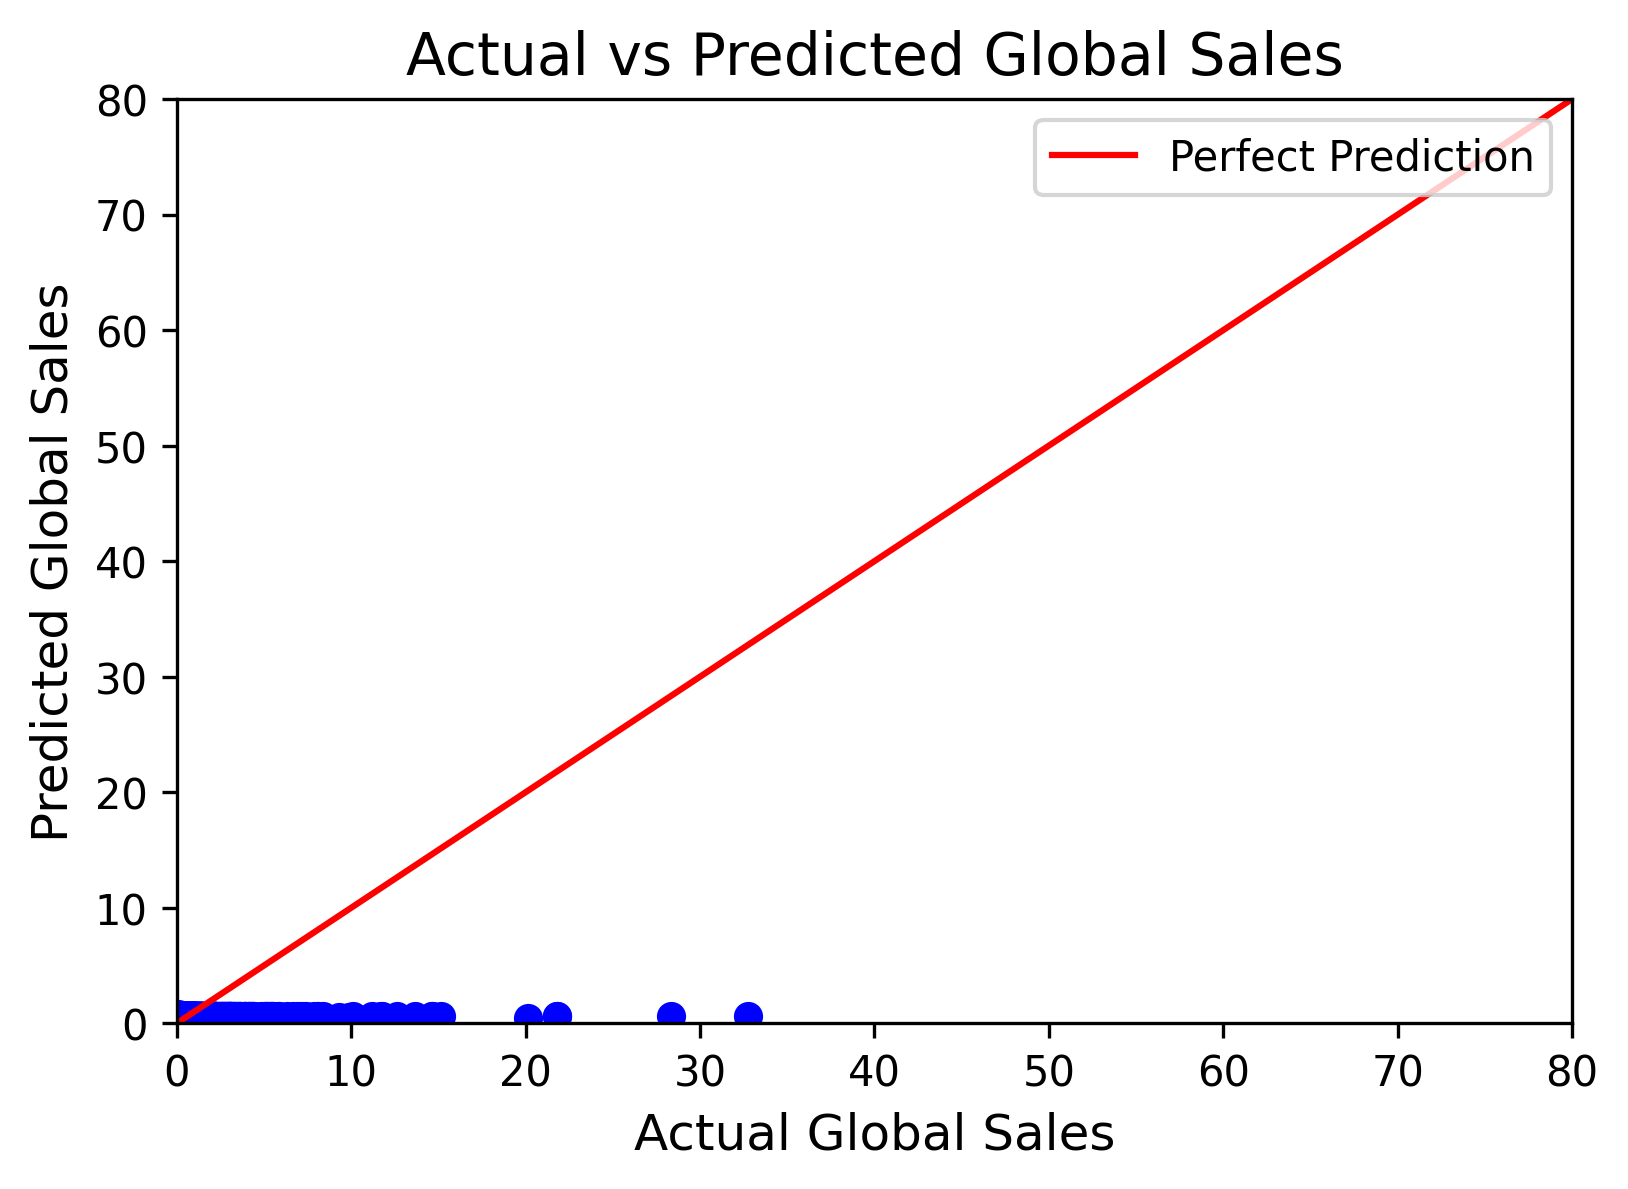

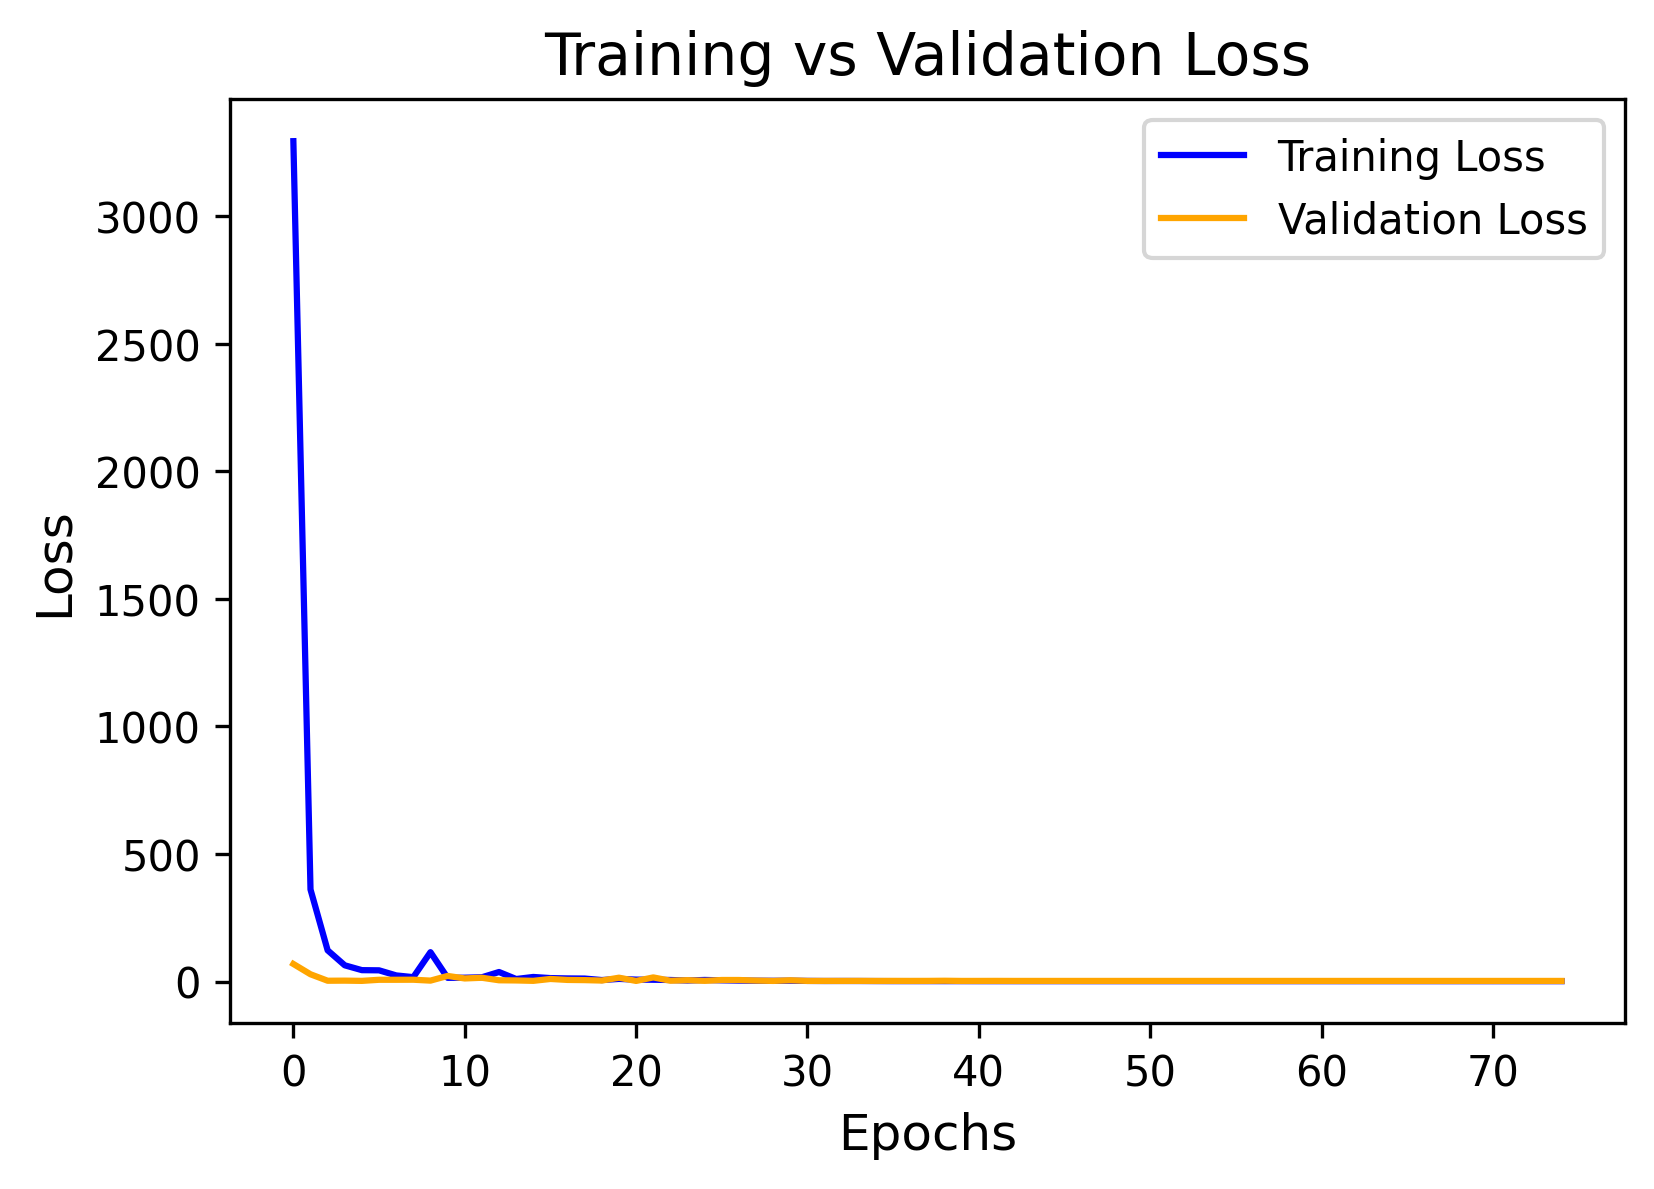

In [98]:
# Predict the model outputs for the testing set
y_pred = model.predict(x_test)

# Plot predicted vs actual values
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(y_test, y_pred, color='blue')  # Adjust marker for better visibility

# Plot a diagonal line to show the one-to-one relation
plt.plot([0, 80], [0, 80], label='Perfect Prediction', color = 'red')  # Dashed line for perfect prediction

# Label both axes and title the plot
plt.xlabel("Actual Global Sales", fontsize=12)
plt.ylabel("Predicted Global Sales", fontsize=12)
plt.title("Actual vs Predicted Global Sales", fontsize=14)

# Limit the range of values on both axes
plt.xlim(0, 80)
plt.ylim(0, 80)

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(history_df["loss"], label="Training Loss", color='blue')
plt.plot(history_df["val_loss"], label="Validation Loss", color='orange')

# Label the axes and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training vs Validation Loss", fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()

##  CNN Architecture Model 2

##### Parameters	Details
- Model Name	Model 2
- Number of Layers	3 Hidden Layers
- Neurons per Layer	64
- Dropout Rate	30 %
- Output Dimension	1
- Input Dimensions	15 Input Features
- Optimizer	Adam (Learning rate: 0.001)
- Loss Function	Mean Squared Error(MSE)
- Batch size	None
- Number of epochs	200
- Validation strategy	10%  (0.1)
- Early stopping	20
- Activation Function	ReLU(Hidden Layers),  Linear(Output Layer)


In [181]:
from tensorflow.keras.layers import Input

# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 4, 64 units, and the
# ReLU activation function.

model.add(Input(shape=(15,)))

model.add(Dense(units = 64, activation = "relu"))
# Add a dropout layer with a 10% dropout rate.

model.add(Dropout(0.3))
# Second hidden layer with 64 units and
# the ReLU activation function.

model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.

model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model

model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                     │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
# Compile the model, using the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error', metrics= ['mean_squared_error'])
# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 200,verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 49757.5586 - mean_squared_error: 49757.5586 - val_loss: 38.4292 - val_mean_squared_error: 38.4292
Epoch 2/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2017.3052 - mean_squared_error: 2017.3052 - val_loss: 8.9864 - val_mean_squared_error: 8.9864
Epoch 3/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 642.6179 - mean_squared_error: 642.6179 - val_loss: 111.8761 - val_mean_squared_error: 111.8761
Epoch 4/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 311.5412 - mean_squared_error: 311.5412 - val_loss: 29.1153 - val_mean_squared_error: 29.1153
Epoch 5/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 121.1505 - mean_squared_error: 121.1505 - val_loss: 25.3985 - val_mean_squared_error: 25.3985
Epoch 6/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 53.7658 - mean_squared_error: 53.7658 - val_loss: 6.1169 - val_mean_squared_error: 6.1169
Epoch 7/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33.4748

In [178]:
y_pred = model.predict(x_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


In [179]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 4.2387
R² Score: -0.0009
Root Mean Squared Error (RMSE): 2.0588
Mean Absolute Error (MAE): 0.6051


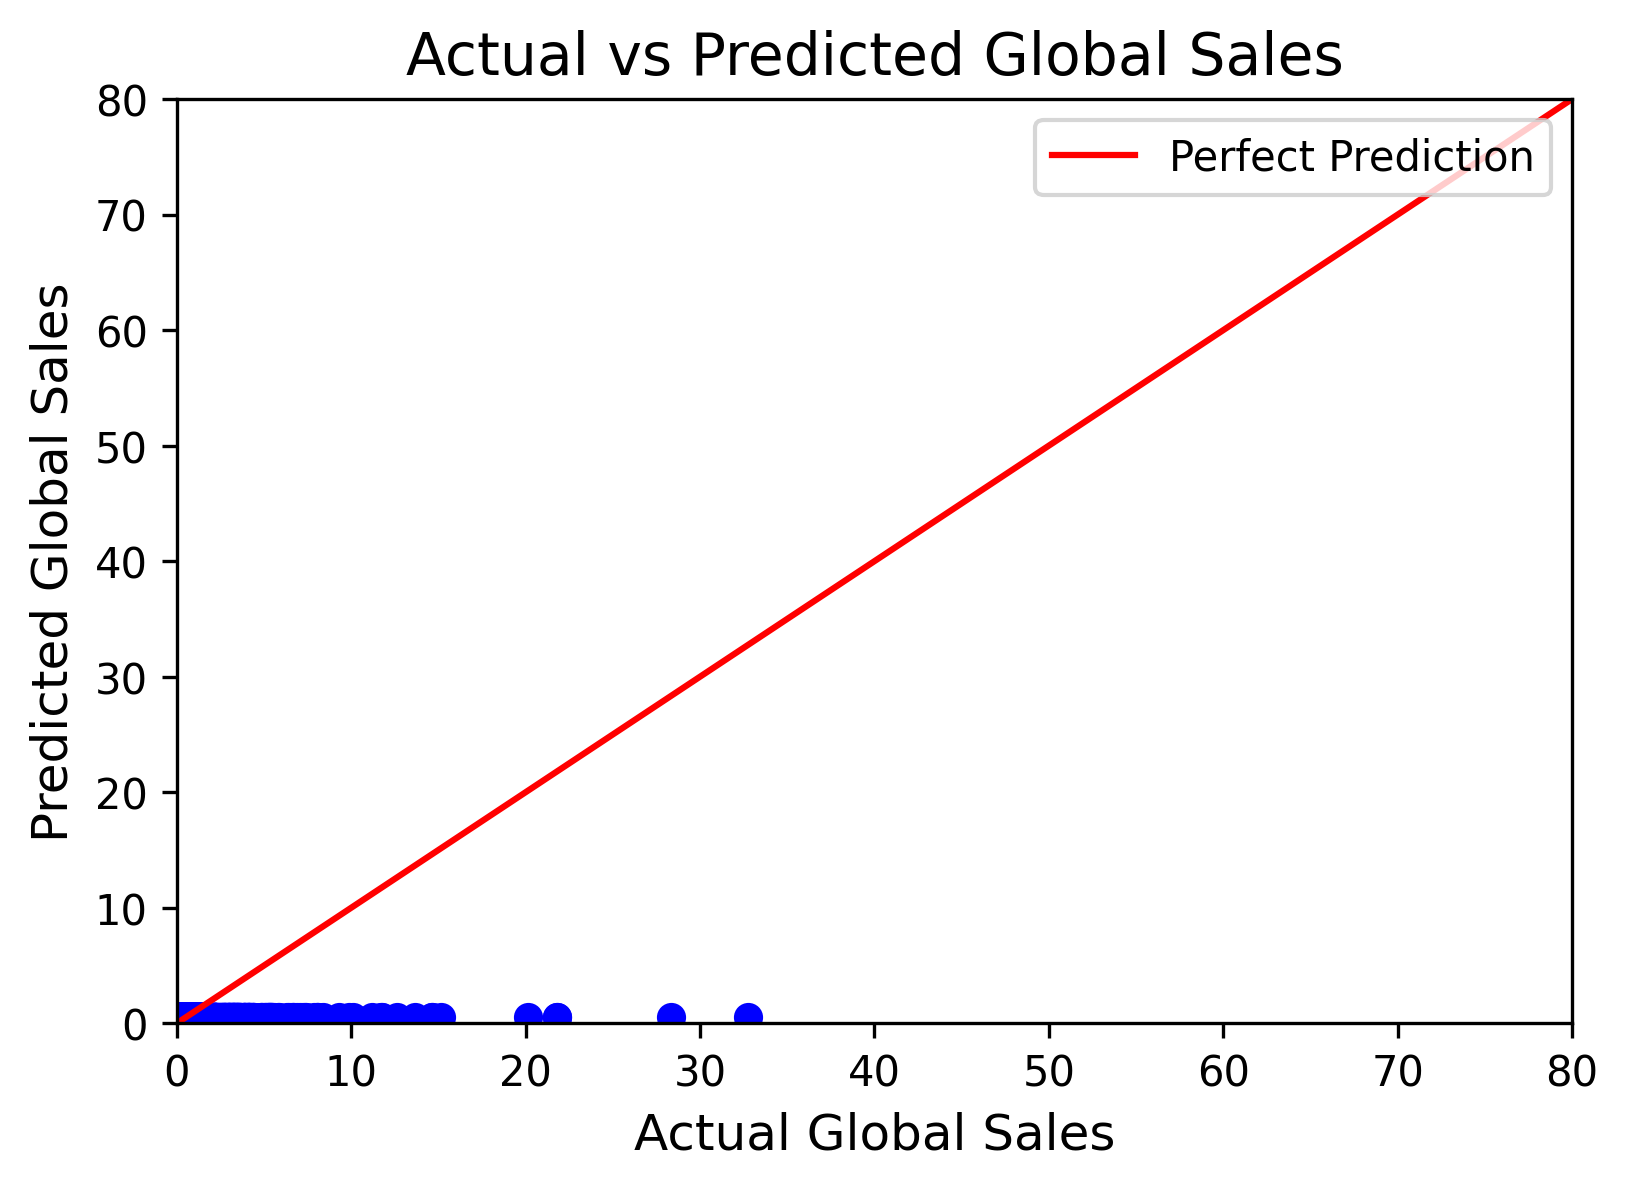

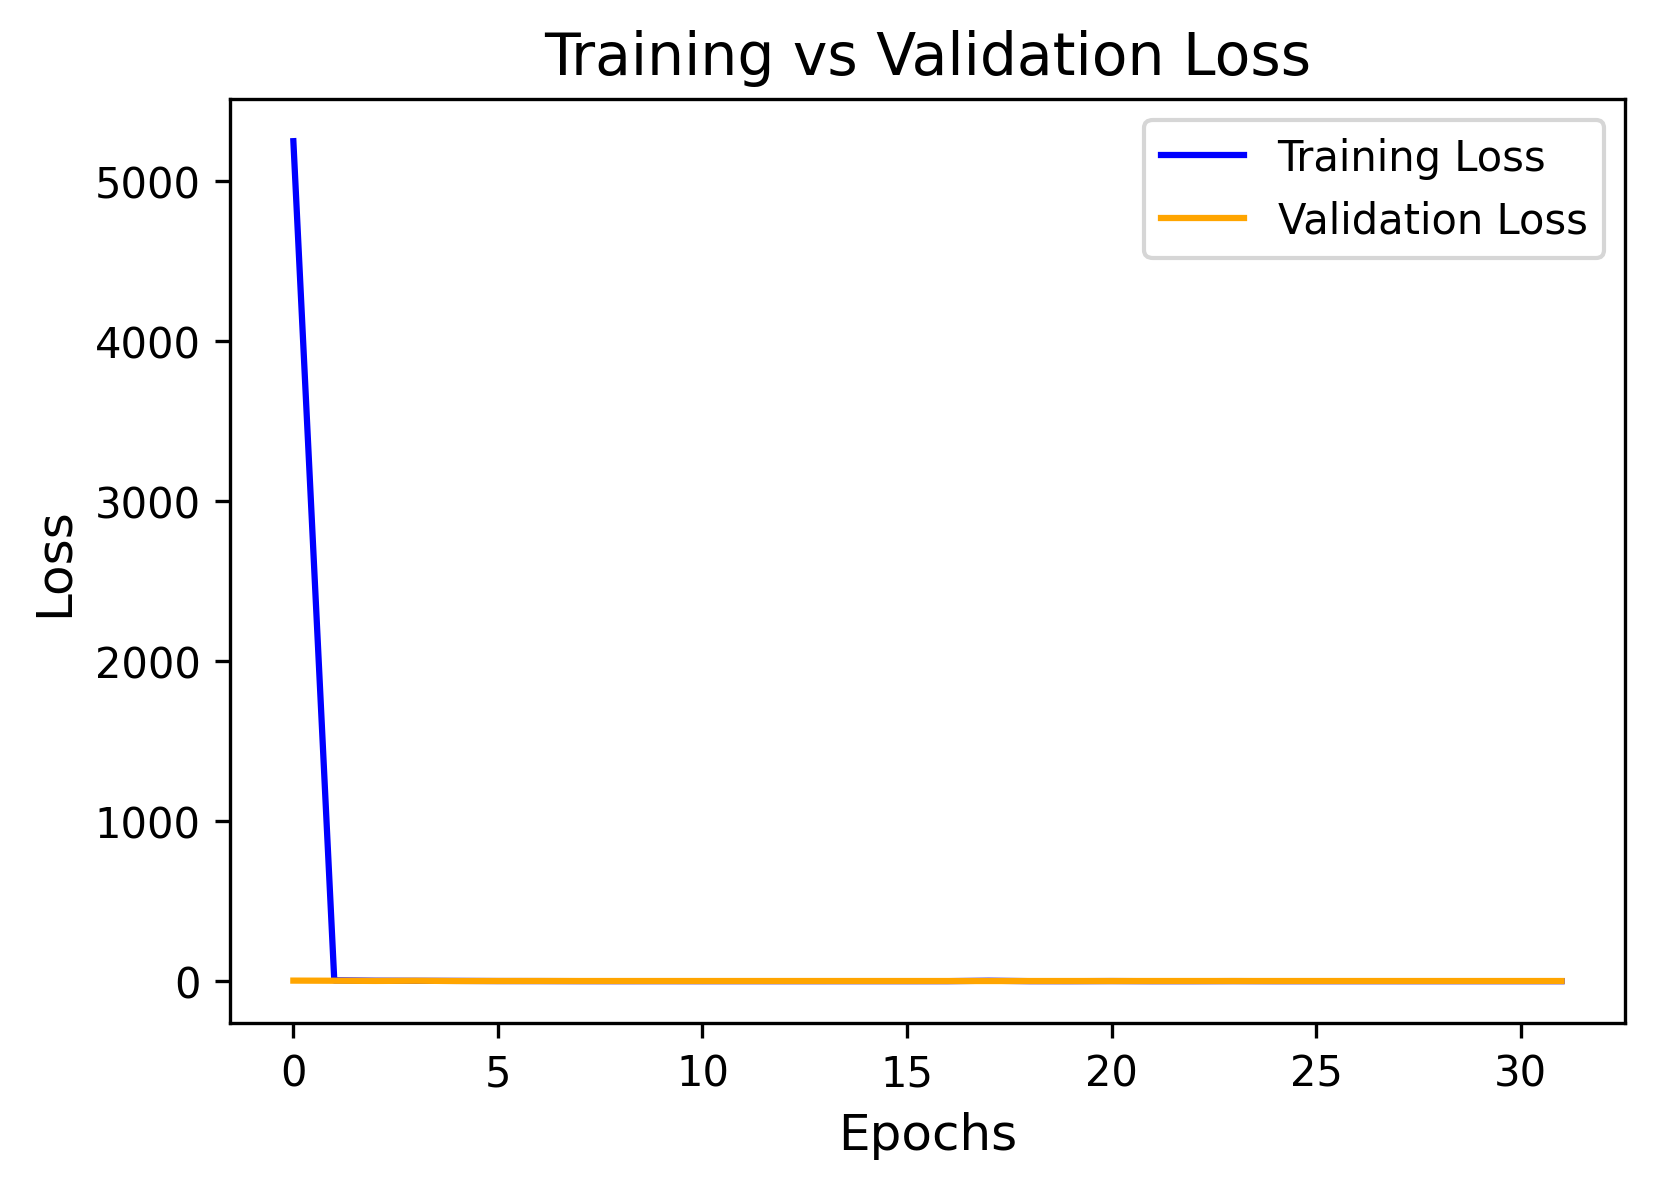

In [180]:
# Plot predicted vs actual values
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(y_test, y_pred, color='blue')  # Adjust marker for better visibility

# Plot a diagonal line to show the one-to-one relation
plt.plot([0, 80], [0, 80], label='Perfect Prediction', color = 'red')  # Dashed line for perfect prediction

# Label both axes and title the plot
plt.xlabel("Actual Global Sales", fontsize=12)
plt.ylabel("Predicted Global Sales", fontsize=12)
plt.title("Actual vs Predicted Global Sales", fontsize=14)

# Limit the range of values on both axes
plt.xlim(0, 80)
plt.ylim(0, 80)

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(history_df["loss"], label="Training Loss", color='blue')
plt.plot(history_df["val_loss"], label="Validation Loss", color='orange')

# Label the axes and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training vs Validation Loss", fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Hyperparameter tuning - using learning rate of 0.01

##  CNN Architecture Model 3

##### Parameters	Details
- Model Name	Model 3
- Number of Layers	3 Hidden Layers
- Neurons per Layer	64
- Dropout Rate	10 %
- Output Dimension	1
- Input Dimensions	15 Input Features
- Optimizer	Adam(Learning rate: 0.01)
- Loss Function	Mean Squared Error(MSE)
- Batch size	None
- Number of epochs	200
- Validation strategy	10%  (0.1)
- Early stopping	20
- Activation Function	ReLU(Hidden Layers),  Linear(Output Layer)


In [169]:
from tensorflow.keras.layers import Input

# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 4, 64 units, and the
# ReLU activation function.

model.add(Input(shape=(15,)))

model.add(Dense(units = 64, activation = "relu"))
# Add a dropout layer with a 10% dropout rate.

model.add(Dropout(0.1))
# Second hidden layer with 64 units and
# the ReLU activation function.

model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.

model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                     │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
optimizer_adam = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer_adam, loss='mean_squared_error', metrics= ['mean_squared_error'])
# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 200,verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30019.8457 - mean_squared_error: 30019.8457 - val_loss: 5.3706 - val_mean_squared_error: 5.3706
Epoch 2/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1331 - mean_squared_error: 9.1331 - val_loss: 4.5943 - val_mean_squared_error: 4.5943
Epoch 3/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8955 - mean_squared_error: 3.8955 - val_loss: 3.3606 - val_mean_squared_error: 3.3606
Epoch 4/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7555 - mean_squared_error: 4.7555 - val_loss: 4.4741 - val_mean_squared_error: 4.4741
Epoch 5/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4858 - mean_squared_error: 3.4858 - val_loss: 2.8405 - val_mean_squared_error: 2.8405
Epoch 6/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3080 - mean_squared_error: 3.3080 - val_loss: 2.8872 - val_mean_squared_error: 2.8872
Epoch 7/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7456 - mean_squared_error: 2.7456 -

In [184]:
y_pred = model.predict(x_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [185]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 200879.0778
R² Score: -47435.0892
Root Mean Squared Error (RMSE): 448.1954
Mean Absolute Error (MAE): 389.9950


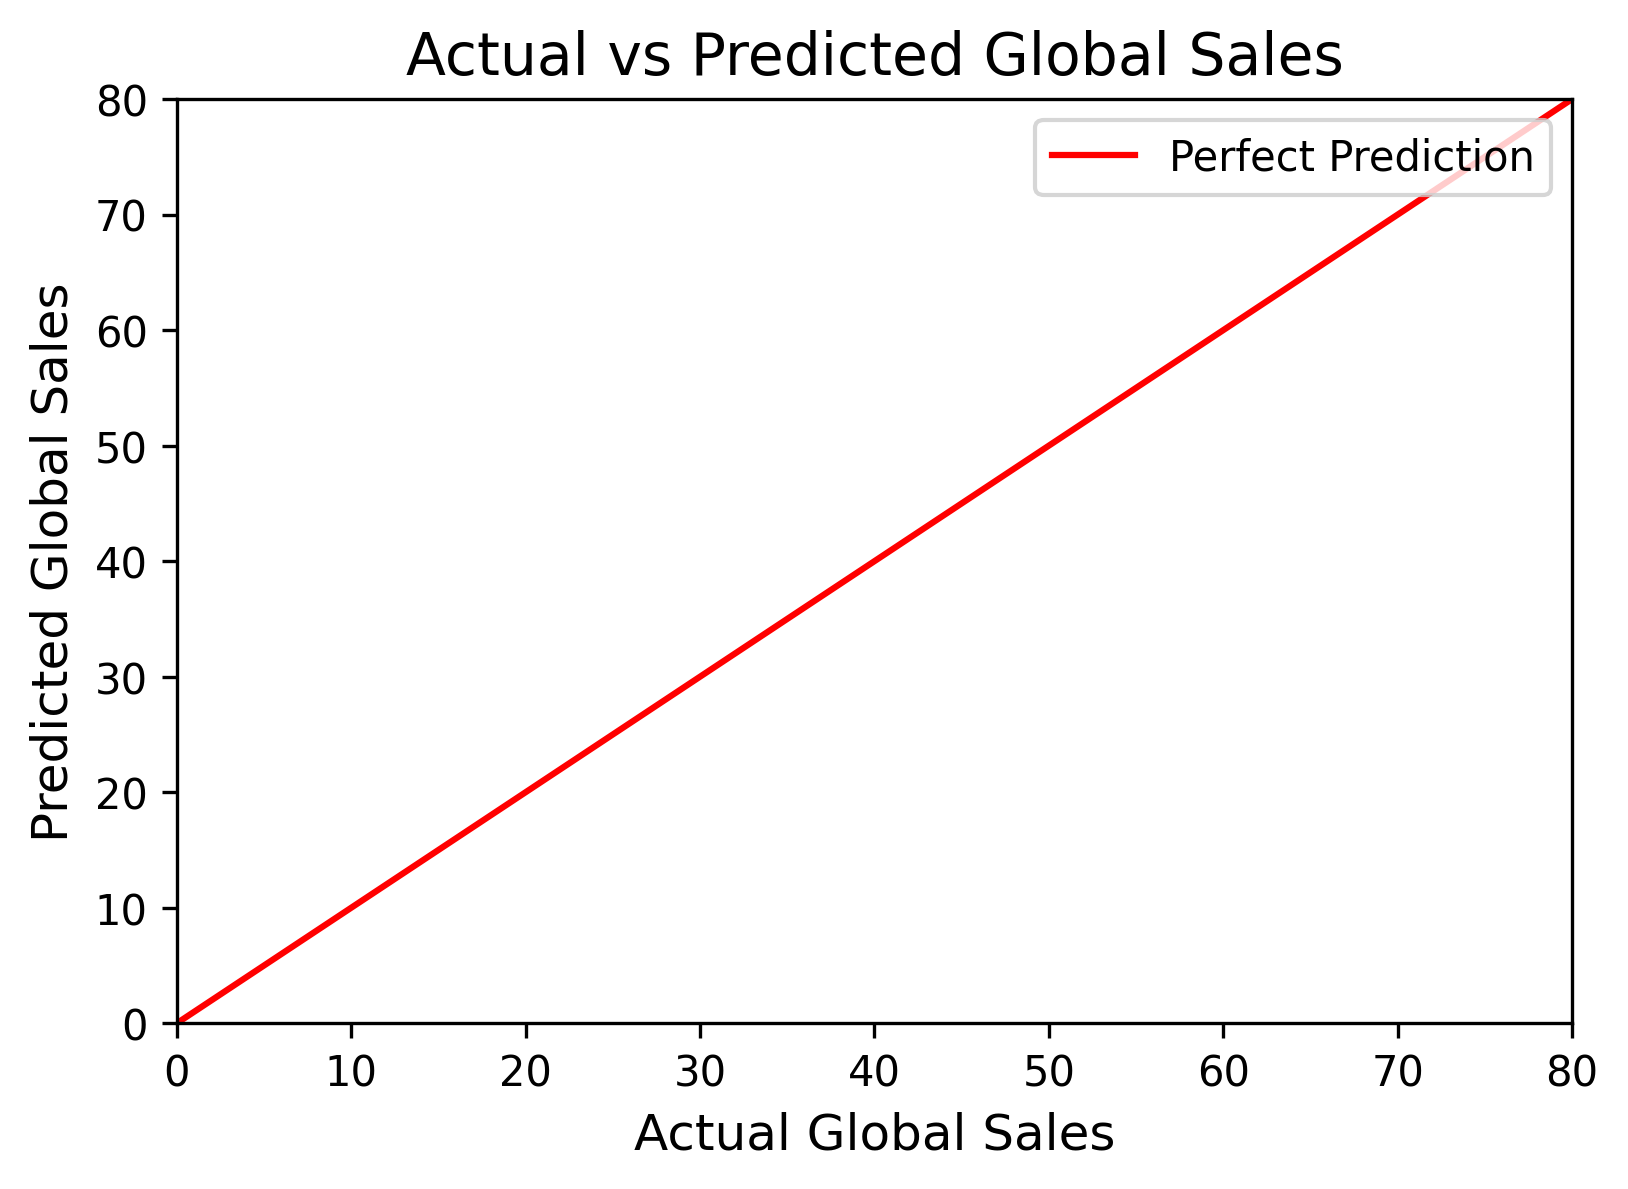

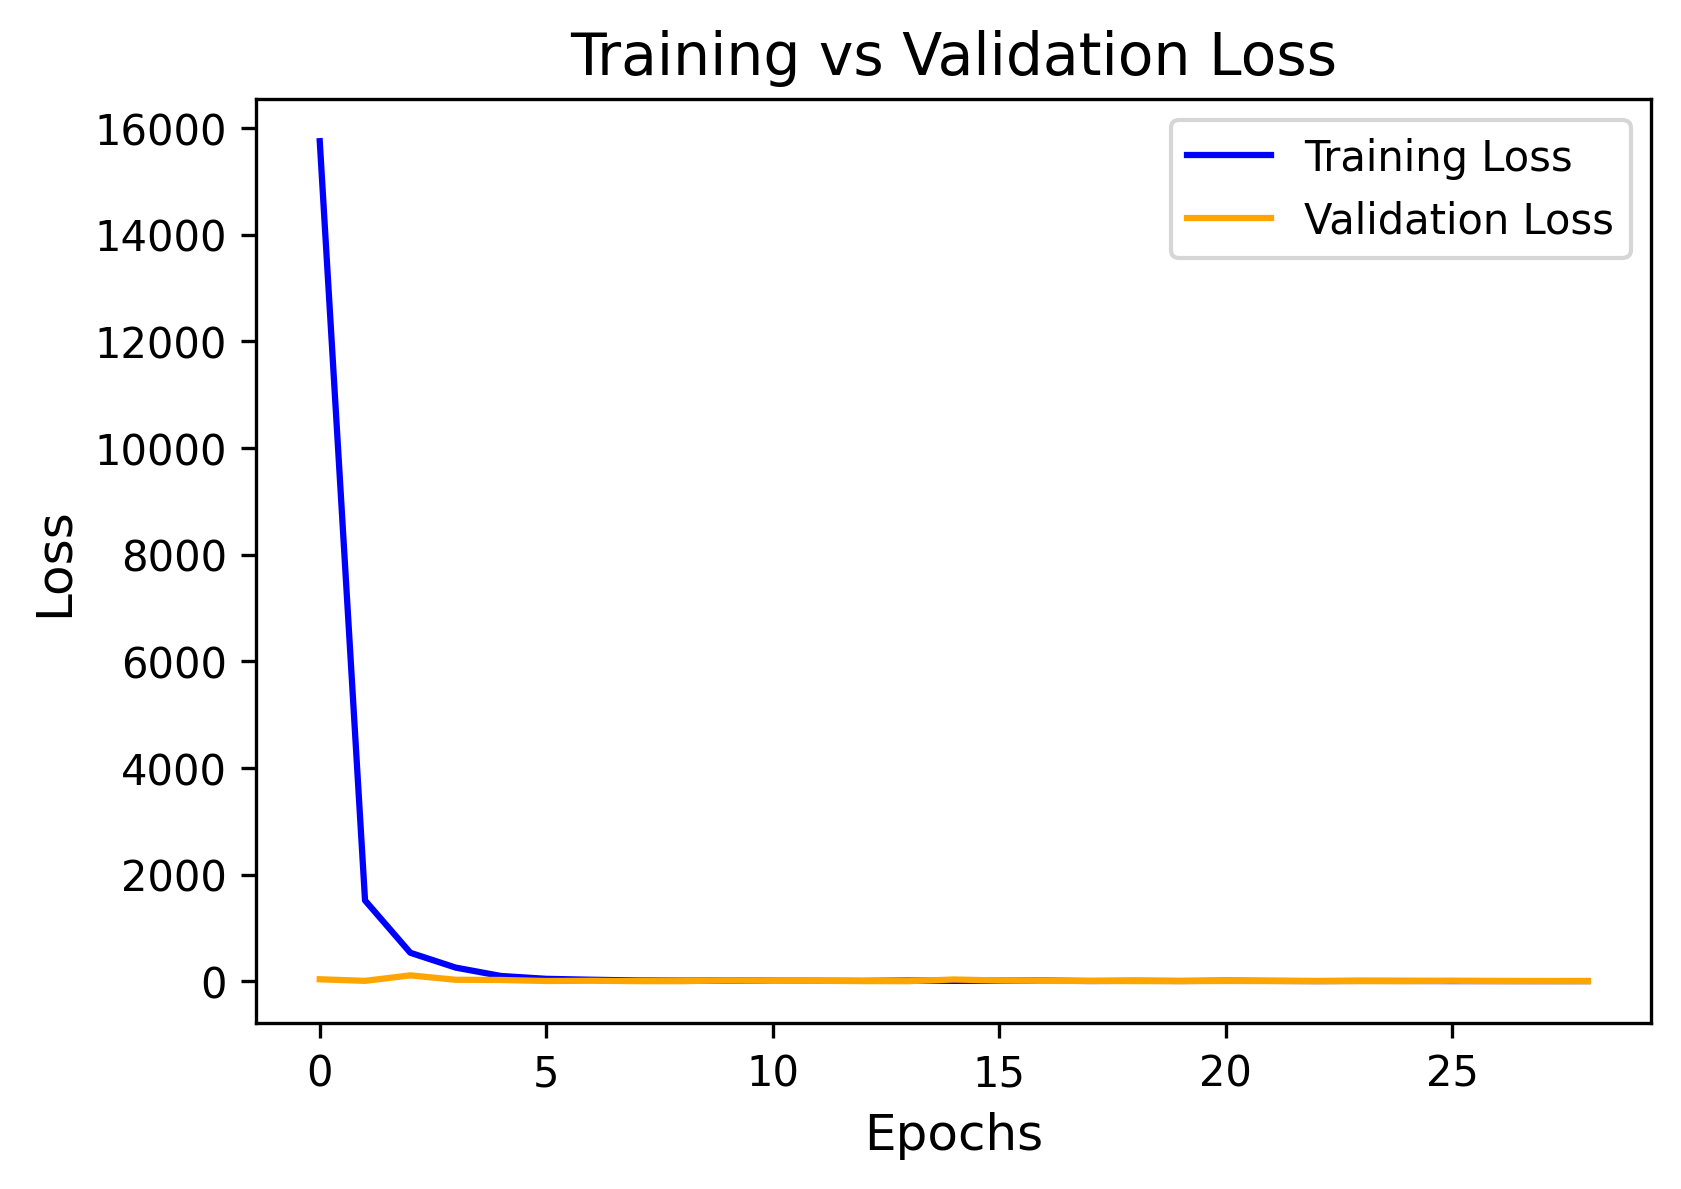

In [186]:
# Plot predicted vs actual values
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(y_test, y_pred, color='blue')  # Adjust marker for better visibility

# Plot a diagonal line to show the one-to-one relation
plt.plot([0, 80], [0, 80], label='Perfect Prediction', color = 'red')  # Dashed line for perfect prediction

# Label both axes and title the plot
plt.xlabel("Actual Global Sales", fontsize=12)
plt.ylabel("Predicted Global Sales", fontsize=12)
plt.title("Actual vs Predicted Global Sales", fontsize=14)

# Limit the range of values on both axes
plt.xlim(0, 80)
plt.ylim(0, 80)

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(history_df["loss"], label="Training Loss", color='blue')
plt.plot(history_df["val_loss"], label="Validation Loss", color='orange')

# Label the axes and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training vs Validation Loss", fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## CNN Architecture Model 4

##### Parameters	Details
- Model Name	Model 4
- Number of Layers	3 Hidden Layers
- Neurons per Layer	128
- Dropout Rate	10 %
- Output Dimension	1
- Input Dimensions	15 Input Features
- Optimizer	Adam (Learning rate: 0.001)
- Loss Function	Mean Squared Error(MSE)
- Batch size	None
- Number of epochs	200
- Validation strategy	10%  (0.1)
- Early stopping	20
- Activation Function	ReLU(Hidden Layers),  Linear(Output Layer)


In [206]:
from tensorflow.keras.layers import Input

# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 4, 64 units, and the
# ReLU activation function.

model.add(Input(shape=(15,)))

model.add(Dense(units = 128, activation = "relu"))
# Add a dropout layer with a 10% dropout rate.

model.add(Dropout(0.1))
# Second hidden layer with 128 units and
# the ReLU activation function.

model.add(Dense(units = 128, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.

model.add(Dense(units = 128, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the life expectancy). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.

model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model

model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,201 (137.50 KB)

 Trainable params: 35,201 (137.50 KB)

 Non-trainable params: 0 (0.00 B)

In [207]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics= ['mean_squared_error'])
# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 200,verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8191.9766 - mean_squared_error: 8191.9766 - val_loss: 22.8817 - val_mean_squared_error: 22.8817
Epoch 2/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 166.2096 - mean_squared_error: 166.2096 - val_loss: 11.1925 - val_mean_squared_error: 11.1925
Epoch 3/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55.6141 - mean_squared_error: 55.6141 - val_loss: 24.2338 - val_mean_squared_error: 24.2338
Epoch 4/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 42.1481 - mean_squared_error: 42.1481 - val_loss: 8.7384 - val_mean_squared_error: 8.7384
Epoch 5/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20.2090 - mean_squared_error: 20.2090 - val_loss: 83.6458 - val_mean_squared_error: 83.6458
Epoch 6/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.6877 - mean_squared_error: 17.6877 - val_loss: 3.2404 - val_mean_squared_error: 3.2404
Epoch 7/200
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.3934 - mean_squa

In [208]:
y_pred = model.predict(x_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [209]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 4.2363
R² Score: -0.0004
Root Mean Squared Error (RMSE): 2.0582
Mean Absolute Error (MAE): 0.6167


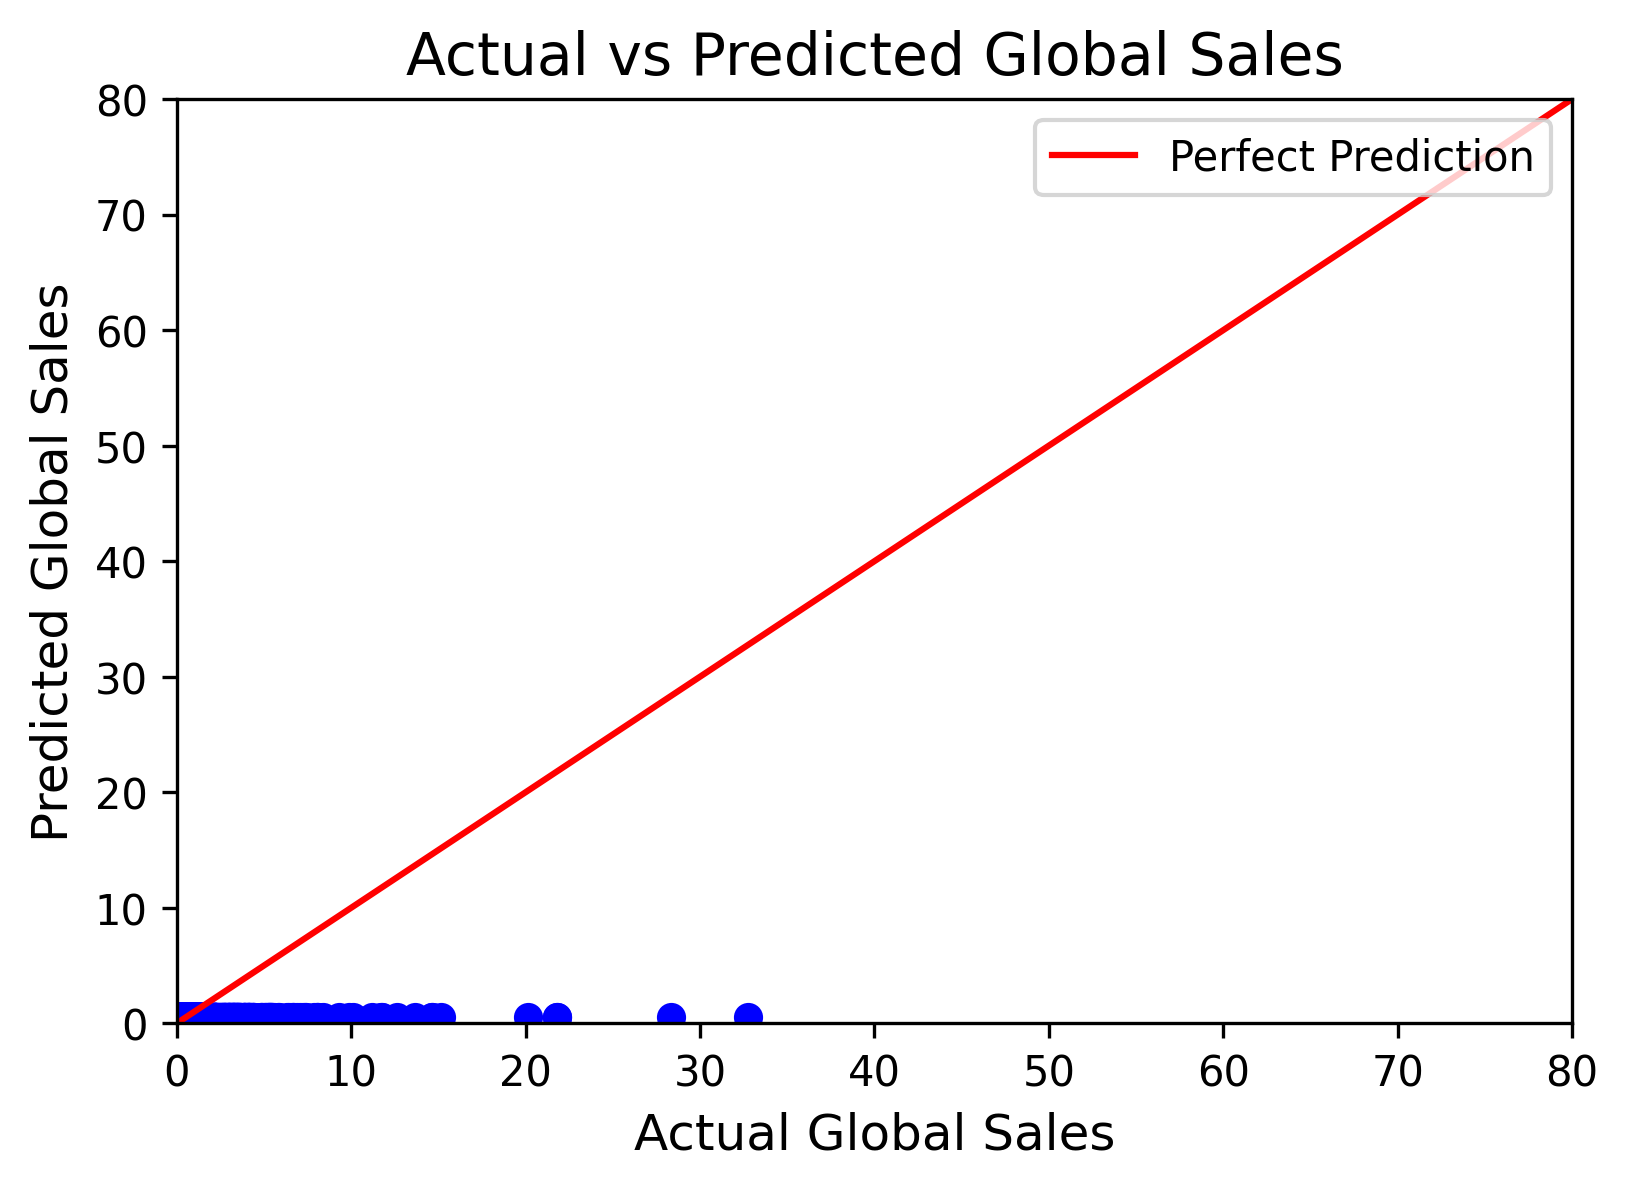

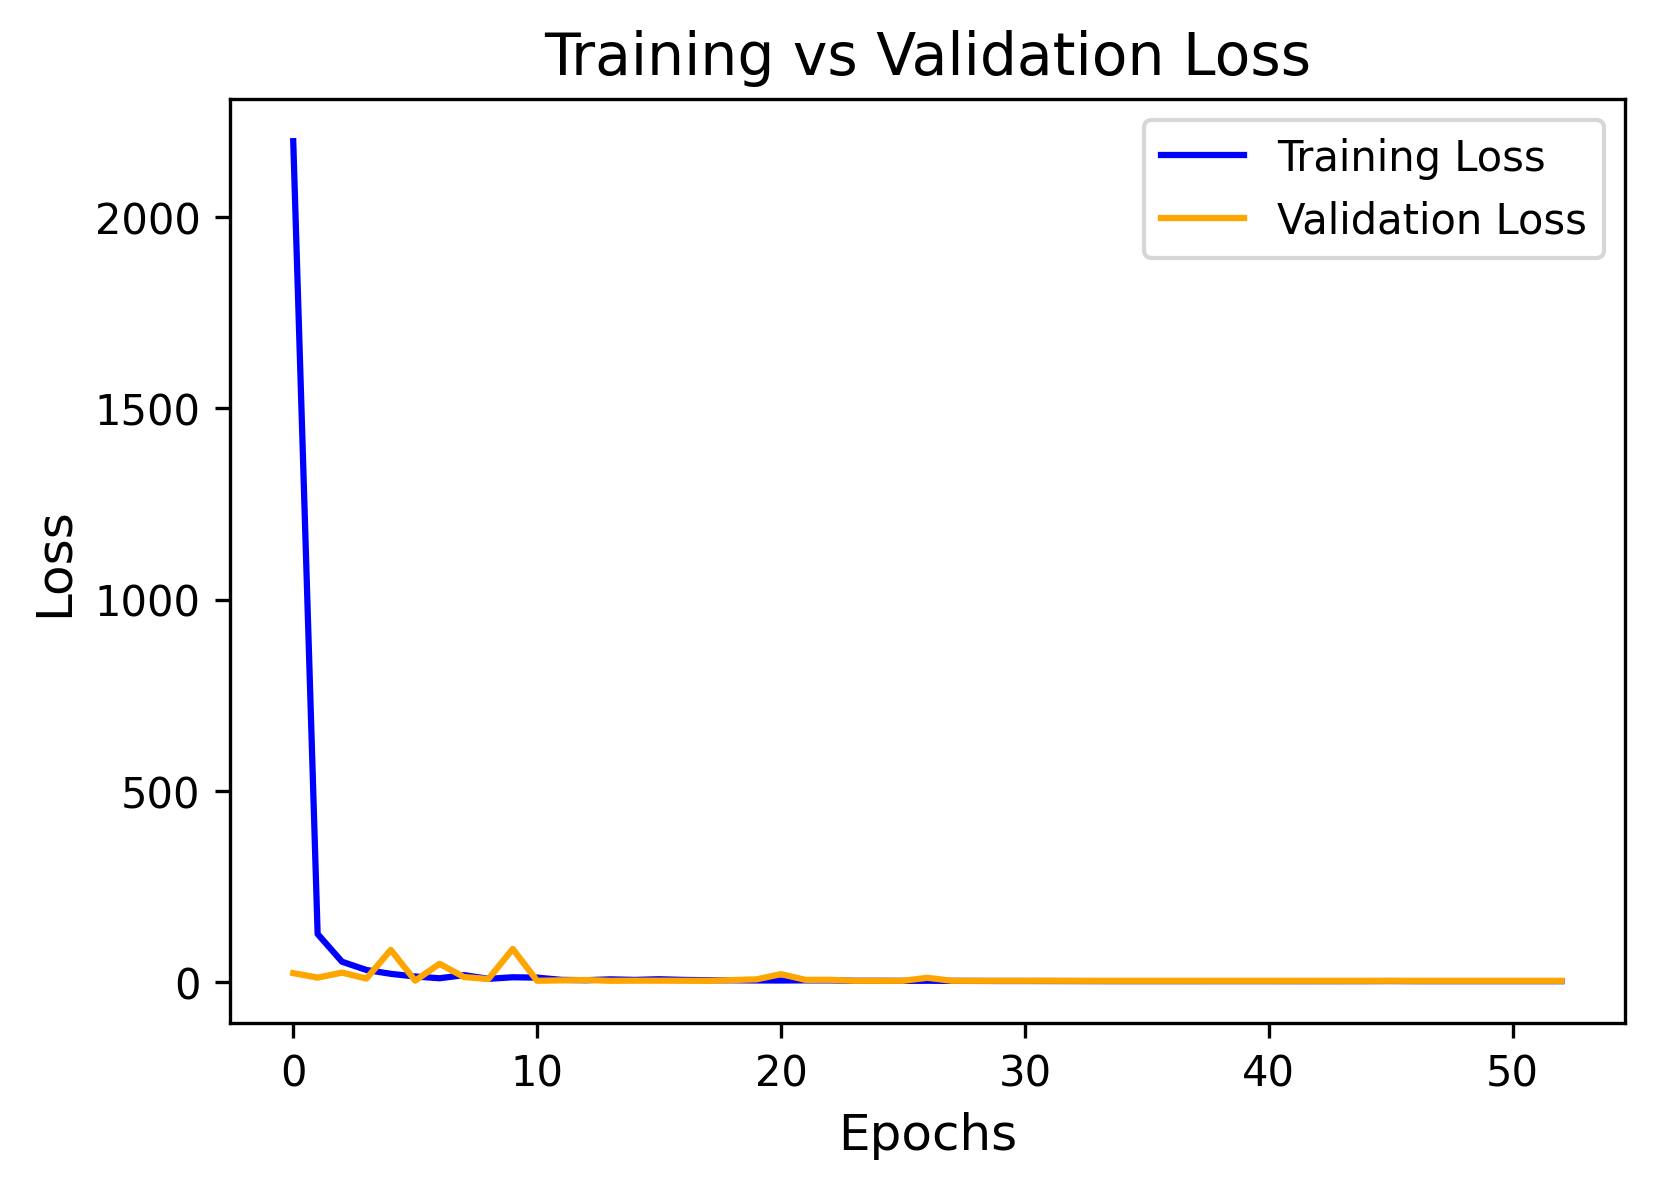

In [210]:
# Plot predicted vs actual values
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(y_test, y_pred, color='blue')  # Adjust marker for better visibility

# Plot a diagonal line to show the one-to-one relation
plt.plot([0, 80], [0, 80], label='Perfect Prediction', color = 'red')  # Dashed line for perfect prediction

# Label both axes and title the plot
plt.xlabel("Actual Global Sales", fontsize=12)
plt.ylabel("Predicted Global Sales", fontsize=12)
plt.title("Actual vs Predicted Global Sales", fontsize=14)

# Limit the range of values on both axes
plt.xlim(0, 80)
plt.ylim(0, 80)

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(history_df["loss"], label="Training Loss", color='blue')
plt.plot(history_df["val_loss"], label="Validation Loss", color='orange')

# Label the axes and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training vs Validation Loss", fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.show()

## e.Based on the results of your analysis, what is the best model for predicting the globalsales of video games and why? You should use suitable figures and evaluation metrics to support your conclusions

In [ ]:
# Plot training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

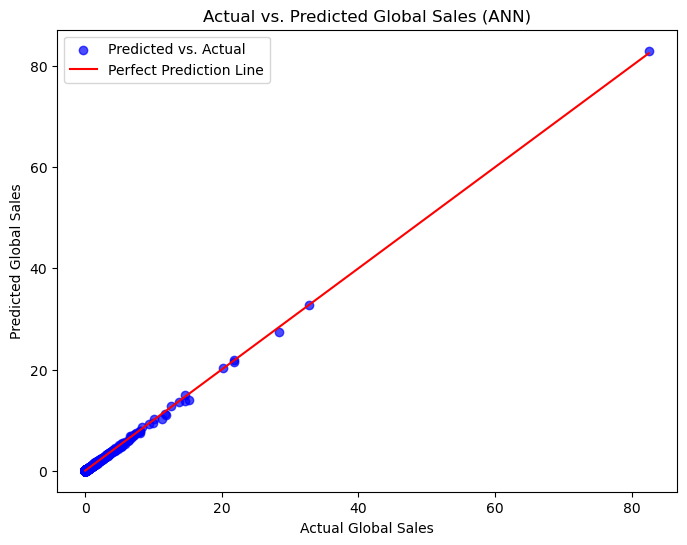

In [517]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Perfect Prediction Line")
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs. Predicted Global Sales (ANN)")
plt.legend()
plt.show()

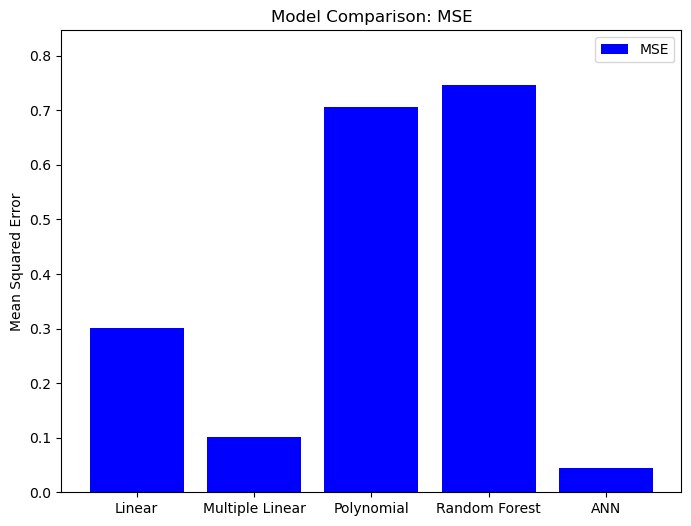

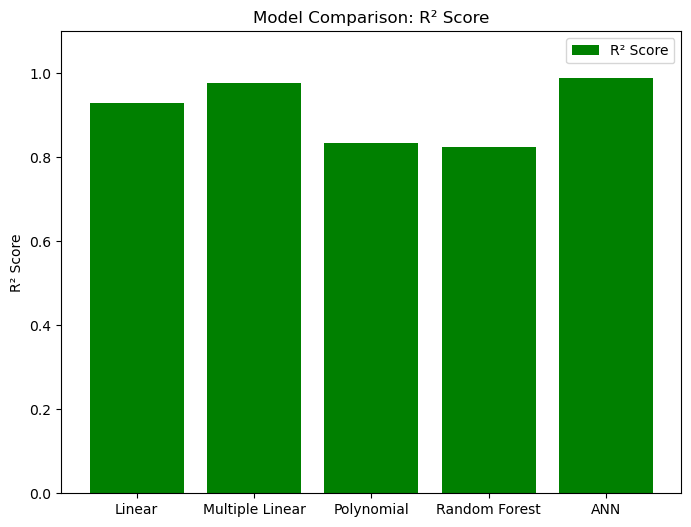

In [8]:
import matplotlib.pyplot as plt

# Comparison of MSE and R² Scores
model_names = ['Linear', 'Multiple Linear','Polynomial', 'Random Forest', 'ANN']
mse_values = [0.3005,0.1020, 0.7066, 0.7465, 0.0439]  # Using the actual MSE values from our results
r2_values = [0.9290,0.9759, 0.8332, 0.8237, 0.9896]    # Using the actual R² values from our results

x = range(len(model_names))

# Plot MSE
plt.figure(figsize=(8, 6))
plt.bar(x, mse_values, color='blue', label='MSE')
plt.xticks(x, model_names)
plt.title('Model Comparison: MSE')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_values) + 0.1)  # to adjust y-axis for better visibility
plt.legend()
plt.show()

# Plot R²
plt.figure(figsize=(8, 6))
plt.bar(x, r2_values, color='green', label='R² Score')
plt.xticks(x, model_names)
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1.1)  # Ensure R² stays within [0, 1.1]
plt.legend()
plt.show()

##### The evaluation metrics and plot above shows that ANN has the lowest MSE( 0.0439) and highest R2(0.9896) so therefore it is the best model for predicting the global sales of video games out of all the models

## K-Means Clustering 

## Using 'NA_Sales', 'EU_Sales' as input features

In [94]:
# Extract the input features
feature_names = ['NA_Sales', 'EU_Sales']  
x = vg_df[feature_names]

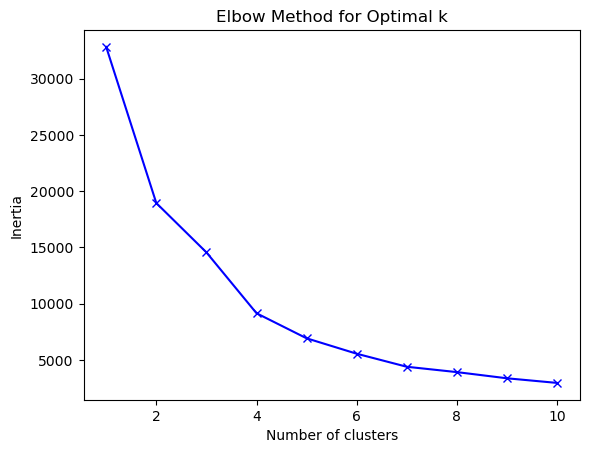

In [96]:
# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data in x
scale.fit(x)

# re-scale each column in x.
x_scaled = scale.transform(x)

# Defining the range of clusters to test
k_range = range(1, 11)  # Testing for k from range 1 to 10
inertia = []

# to fit k-Means for each value of k and compute inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)  
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_range, inertia, 'bx-')  # 'bx-' means blue x's connected by lines
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

##### Using the elbow method which is where the starts to flatten out the optimal k is 2 

In [141]:
# Fit the final k-Means model with optimal k 2 from the elbow method
kmeans_final = KMeans(n_clusters = 2, random_state = 42)
kmeans_final.fit(x_scaled)

#to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [143]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)


print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.9854
Silhouette Coefficient: 0.4310


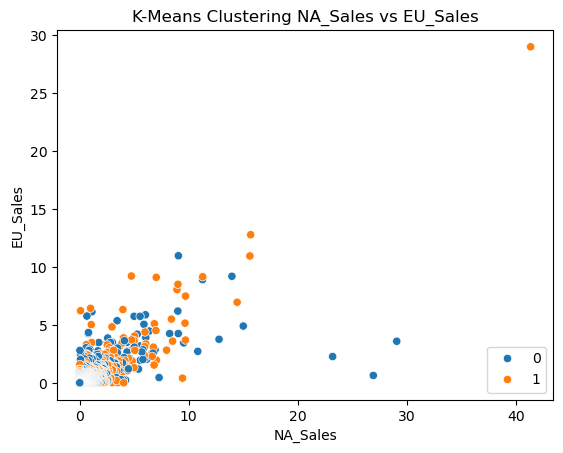

In [144]:
sns.scatterplot(data = vg_df, x= 'NA_Sales', y='EU_Sales', hue =cluster_labels_pred)
# Adding a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("NA_Sales")
plt.ylabel("EU_Sales")

plt.title("K-Means Clustering NA_Sales vs EU_Sales")

plt.show()

## Using 'JP_Sales', 'Other_Sales' as input features

In [112]:
feature_names = ['JP_Sales', 'Other_Sales']
x = vg_df[feature_names]

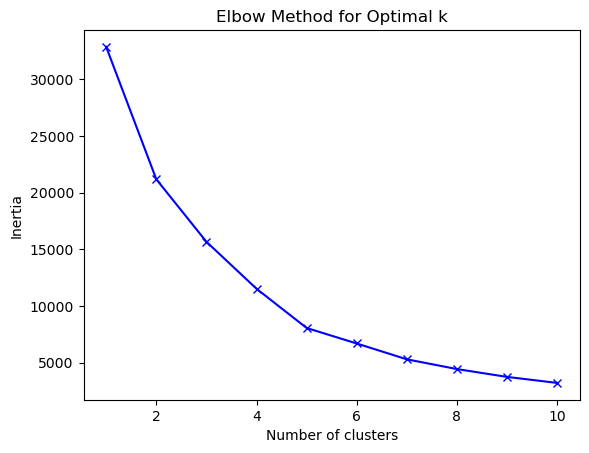

In [114]:
# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data in x
scale.fit(x)

# re-scale each column in x.
x_scaled = scale.transform(x)

# Defining the range of clusters to test
k_range = range(1, 11)  # Testing for k from range 1 to 10
inertia = []

# to fit k-Means for each value of k and compute inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)  
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_range, inertia, 'bx-')  # 'bx-' means blue x's connected by lines
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

##### Using the elbow method which is where the starts to flatten out the optimal k is 2 and 5, but will go for 5 cause the decline is sharper at 5

In [132]:
# Fit the final k-Means model with optimal k 2 from the elbow method
kmeans_final = KMeans(n_clusters = 5, random_state = 42)
kmeans_final.fit(x_scaled)

#to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [134]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)


print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.7285
Silhouette Coefficient: 0.6261


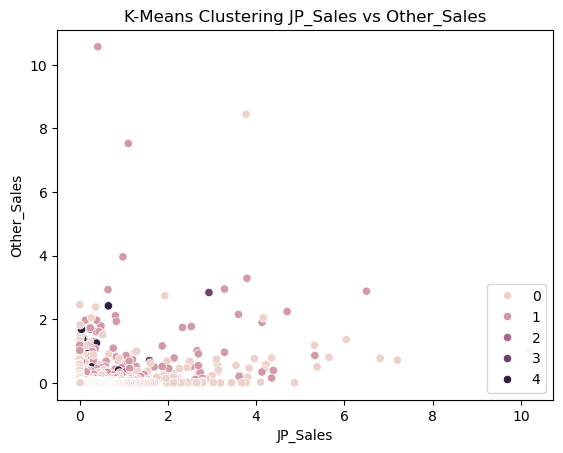

In [139]:
sns.scatterplot(data = vg_df, x= 'JP_Sales', y ='Other_Sales', hue =cluster_labels_pred)
# Adding a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("JP_Sales")
plt.ylabel("Other_Sales")
plt.title("K-Means Clustering JP_Sales vs Other_Sales")

plt.show()

## Using 'Critic_Score', 'User_Score' as input features

In [147]:
feature_names = ['Critic_Score', 'User_Score']
x = vg_df[feature_names]

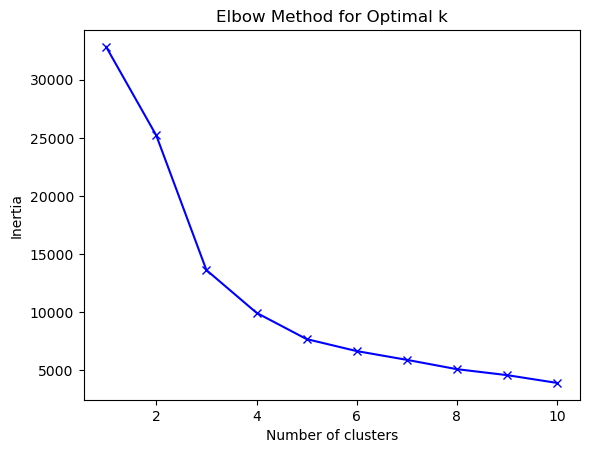

In [149]:
# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data in x
scale.fit(x)

# re-scale each column in x.
x_scaled = scale.transform(x)

# Defining the range of clusters to test
k_range = range(1, 11)  # Testing for k from range 1 to 10
inertia = []

# to fit k-Means for each value of k and compute inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)  
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_range, inertia, 'bx-')  # 'bx-' means blue x's connected by lines
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

##### Using the elbow method which is where the starts to flatten out the optimal k is 3

In [151]:
# Fit the final k-Means model with optimal k 3 from the elbow method
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)

#to predict the cluster labels for each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

In [153]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)


print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.7602
Silhouette Coefficient: 0.5712


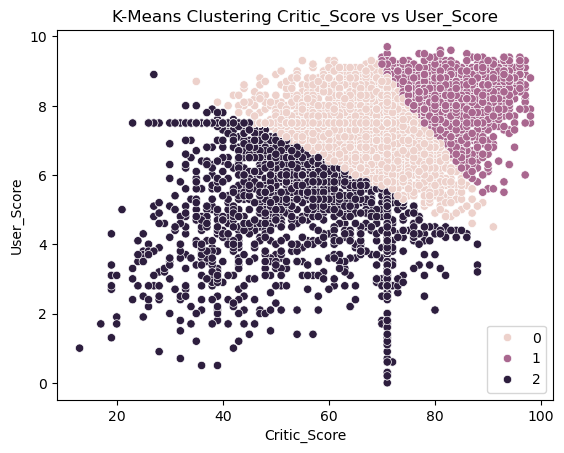

In [155]:
sns.scatterplot(data = vg_df, x= 'Critic_Score', y ='User_Score', hue =cluster_labels_pred)
# Adding a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel('Critic_Score')
plt.ylabel('User_Score')

plt.title("K-Means Clustering Critic_Score vs User_Score")

plt.show()

##### Evaluation Metrics
Davies-Bouldin Index (DBI): A lower DBI indicates better clustering.

Silhouette Score: A higher Silhouette Score indicates better-defined clusters.

the combination of 'NA_Sales', 'EU_Sales' produces the best clustering results, as it has:

The lowest DBI ( 0.6119), indicating compact and separated clusters.
The highest Silhouette Coefficient (0.9390), showing well-defined and distinct clusters.

## g. Using another clustering algorithm - Hierarchical Clustering (Agglomerative)

## Input features - NA_Sales , EU_Sales

In [205]:
# Extract the input features
feature_names = ['NA_Sales', 'EU_Sales']  # Review variables
x = vg_df[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)


#  AgglomerativeClustering, using 2 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')

#  fitting the model to the dataset. 
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [207]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.0073
Silhouette Score: 0.9900


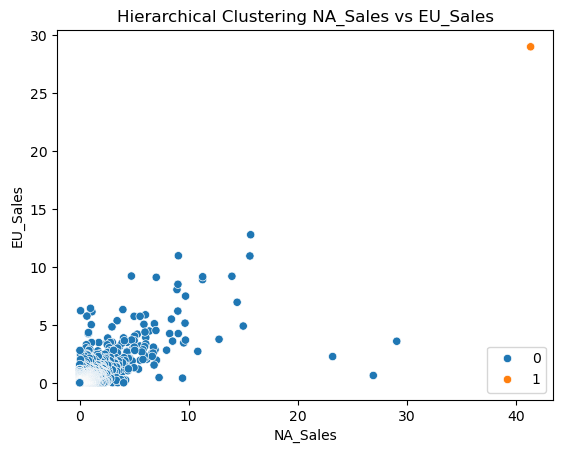

In [170]:
sns.scatterplot(data = vg_df, x= 'NA_Sales', y='EU_Sales', hue =agg_labels_pred)
# Adding a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("NA_Sales")
plt.ylabel("EU_Sales")

plt.title("Hierarchical Clustering NA_Sales vs EU_Sales")

plt.show()

## Input features -JP Sales, Other_Sales 

In [182]:
# Extract the input features
feature_names = ['JP_Sales', 'Other_Sales']  # Review variables
x = vg_df[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

#  AgglomerativeClustering, using 5 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')

#  fitting the model to the dataset. 
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [178]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.4162
Silhouette Score: 0.9437


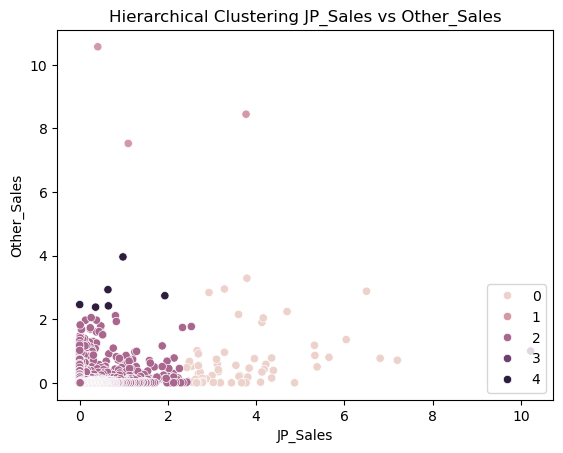

In [180]:
sns.scatterplot(data = vg_df, x= 'JP_Sales', y='Other_Sales', hue =agg_labels_pred)
# Adding a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("JP_Sales")
plt.ylabel("Other_Sales")

plt.title("Hierarchical Clustering JP_Sales vs Other_Sales")

plt.show()

## Input features -Critic score, user score

In [199]:
# Extract the input features
feature_names = ['Critic_Score', 'User_Score']  # Review variables
x = vg_df[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

#  AgglomerativeClustering, using 5 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

#  fitting the model to the dataset. 
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [201]:
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.7963
Silhouette Score: 0.6250


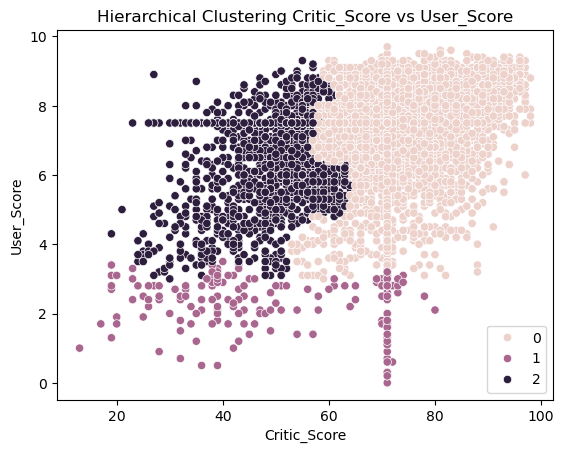

In [203]:
sns.scatterplot(data = vg_df, x= 'Critic_Score', y='User_Score', hue =agg_labels_pred)
# Adding a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Critic_Score")
plt.ylabel("User_Score")

plt.title("Hierarchical Clustering Critic_Score vs User_Score")

plt.show()

##### In Conclusion the combination 'NA_Sales', 'EU_Sales'has the lowest DBI Score of 0.0073 and highest Silhouette Score of 0.9900 which makes it the best clustering result amongst the other combination.

In [13]:
conda install nbconvert

Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - nbconvert


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.11.26 |       hecd8cb5_0         132 KB
    conda-24.11.0              |  py312hecd8cb5_0         1.2 MB
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following packages will be UPDATED:

  ca-certificates                      2024.9.24-hecd8cb5_0 --> 2024.11.26-hecd8cb5_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2024.8.30~ --> pkgs/main/osx-64::certifi-2024.8.30-py312hecd8cb5_0 
  conda              conda-forge::conda-24.11.0-py312hb401~ --> pkgs/main::conda-24.11.0-py3

In [7]:
brew install pandoc

zsh:1: command not found: brew


In [13]:
jupyter nbconvert --to pdf --PDFExporter.latex_command="['xelatex', '--interaction=nonstopmode', '{filename}']" OLAMIDEBANKOLECOMPONENTONEAI.ipynb



SyntaxError: invalid syntax (1023135286.py, line 1)

In [15]:
jupyter nbconvert --to pdf --PDFExporter.latex_command="['xelatex', '--interaction=nonstopmode', '{filename}']" "OLAMIDE BANKOLE AI.ipynb"

usage: ipython [-h] [--debug] [--show-config] [--show-config-json] [--quiet]
               [--init] [--autoindent] [--no-autoindent] [--automagic]
               [--no-automagic] [--pdb] [--no-pdb] [--pprint] [--no-pprint]
               [--color-info] [--no-color-info] [--ignore-cwd]
               [--no-ignore-cwd] [--nosep] [--autoedit-syntax]
               [--no-autoedit-syntax] [--simple-prompt] [--no-simple-prompt]
               [--banner] [--no-banner] [--confirm-exit] [--no-confirm-exit]
               [--term-title] [--no-term-title] [--classic] [--quick] [-i]
               [--log-level TerminalIPythonApp.log_level]
               [--profile-dir ProfileDir.location]
               [--profile TerminalIPythonApp.profile]
               [--ipython-dir TerminalIPythonApp.ipython_dir]
               [--config TerminalIPythonApp.extra_config_file]
               [--autocall TerminalInteractiveShell.autocall]
               [--colors TerminalInteractiveShell.colors]
             

In [17]:
pip install --upgrade --user nbconvert

Note: you may need to restart the kernel to use updated packages.
